In [1]:
import os
import numpy as np
import pandas as pd
import torch
from tqdm import tqdm


import gc

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

from src import DATA_PATH, ROOT_PATH
VERSION = 'v16'


# 前処理

In [2]:
food_values = pd.read_csv(os.path.join(DATA_PATH, "food_value.csv"))
resp = pd.read_csv(os.path.join(DATA_PATH, "data_responses_NCNP_2types.csv"))
res_L_mean = resp.groupby("img")["res_L"].mean()
res_H_mean = resp.groupby("img")["res_H"].mean()
res_T_mean = resp.groupby("img")["res_T"].mean()

from PIL import Image

image_dir = os.path.join(ROOT_PATH, "Database")
image_files = sorted([f for f in os.listdir(image_dir) if f.endswith(".jpg")])

# Load the data
image_rgb = pd.DataFrame(
    [
        np.array(Image.open(os.path.join(image_dir, img)).convert("RGB")).mean(
            axis=(0, 1)
        )
        for img in image_files
    ],
    columns=["R", "G", "B"],
    index=image_files,
)

In [3]:
gram_value_is_not_nan = ~np.isnan(food_values["grams_total"].values)
labels = np.array(
    [
        res_L_mean.values,
        res_H_mean.values,
        res_T_mean.values,
        food_values["kcal_100g"].values,
        food_values["protein_100g"].values,
        food_values["fat_100g"].values,
        food_values["carbs_100g"].values,
        food_values["kcal_total"].values,
        food_values["grams_total"].values,
        image_rgb["R"].values,
        image_rgb["G"].values,
        image_rgb["B"].values,
        food_values["is_processed_foods"].astype(int).values,
        food_values["is_testy"].astype(int).values,
    ]
)

labels.shape

(14, 896)

# 分析

## Ridge回帰

In [ ]:
from src.analysis import (
    pearson_correlation,
    init_ridge_analysis,
    get_features_pc,
    search_best_binary,
    search_best_regression,
)
from src.analysis import run_ridge_analysis
from src.const import index_name
gc.collect()

# inn is is not nan

search_binary, search_regression = init_ridge_analysis()
data_len = 36
result_dfs = pd.DataFrame(columns=np.arange(data_len))

data_dir = os.path.join(
    DATA_PATH,
    "output",
    "activation_features_regression",
    VERSION ,
)
os.makedirs(data_dir, exist_ok=True)

for type_ in ["obesity", "normal"]:
    result_df = pd.DataFrame(index=index_name, columns=np.arange(data_len))
    result_df["type"] = type_
    save_dir = os.path.join(
        DATA_PATH,
        "output",
        "activation_features_regression",
        VERSION,
        type_,
    )

    os.makedirs(save_dir, exist_ok=True)

    result_df = run_ridge_analysis(
        result_df,
        search_binary,
        search_regression,
        labels,
        gram_value_is_not_nan,
        save_dir,
        data_dir,
        labels,
        data_len,
    )
    result_dfs = pd.concat([result_dfs, result_df])

  0%|          | 0/36 [00:00<?, ?it/s]

Layer 0
pca start
labels shape (14, 896)
Label 0 shape: (896,)
regression start
-0.4815973701626348
Label 1 shape: (896,)
regression start
-0.3619157496250065
Label 2 shape: (896,)
regression start
-0.3961755701885725
Label 3 shape: (896,)
regression start
-0.11690205840698598
Label 4 shape: (896,)
regression start
-0.5955445468998726
Label 5 shape: (896,)
regression start
-0.6215510794713648
Label 6 shape: (896,)
regression start
-0.6780581879074168
Label 7 shape: (896,)
regression start
-0.32718016307122166
Label 8 shape: (896,)
regression start
-2.488128080750048
Label 9 shape: (896,)
regression start
0.7422766754332961
Label 10 shape: (896,)
regression start
0.7895444837347512
Label 11 shape: (896,)
regression start
0.8131061510036985
Label 12 shape: (896,)
binary start
0.6944444444444444
Label 13 shape: (896,)
binary start


  3%|▎         | 1/36 [01:55<1:07:20, 115.46s/it]

0.5166666666666667
Layer 1
pca start
labels shape (14, 896)
Label 0 shape: (896,)
regression start
-0.7256358587817995
Label 1 shape: (896,)
regression start
-0.4348592258380868
Label 2 shape: (896,)
regression start
-0.3429857521016404
Label 3 shape: (896,)
regression start
-0.31849337205973627
Label 4 shape: (896,)
regression start
-0.3815329302187982
Label 5 shape: (896,)
regression start
-0.6178031086173037
Label 6 shape: (896,)
regression start
-1.2104232482021788
Label 7 shape: (896,)
regression start
-0.30578020641038894
Label 8 shape: (896,)
regression start
-1079.8862228205696
Label 9 shape: (896,)
regression start
0.9696162478408865
Label 10 shape: (896,)
regression start
0.9821250098674432
Label 11 shape: (896,)
regression start
0.9793457990171599
Label 12 shape: (896,)
binary start
0.7444444444444445
Label 13 shape: (896,)
binary start


  6%|▌         | 2/36 [03:36<1:00:34, 106.88s/it]

0.5166666666666667
Layer 2
pca start
labels shape (14, 896)
Label 0 shape: (896,)
regression start
-0.5440452056996101
Label 1 shape: (896,)
regression start
-0.2591415780518649
Label 2 shape: (896,)
regression start
-0.372946780493022
Label 3 shape: (896,)
regression start
-0.5823707954605692
Label 4 shape: (896,)
regression start
-0.3353148105363244
Label 5 shape: (896,)
regression start
-0.9033931177849739
Label 6 shape: (896,)
regression start
-0.3021577924906982
Label 7 shape: (896,)
regression start
-0.8718695228005986
Label 8 shape: (896,)
regression start
-19546.510444904747
Label 9 shape: (896,)
regression start
0.9000842360199481
Label 10 shape: (896,)
regression start
0.9146276477947014
Label 11 shape: (896,)
regression start
0.9389595873225978
Label 12 shape: (896,)
binary start
0.7166666666666667
Label 13 shape: (896,)
binary start


  8%|▊         | 3/36 [05:43<1:03:58, 116.32s/it]

0.4722222222222222
Layer 3
pca start
labels shape (14, 896)
Label 0 shape: (896,)
regression start
-0.29898010454196866
Label 1 shape: (896,)
regression start
0.0027610293104139982
Label 2 shape: (896,)
regression start
-0.24610509062364105
Label 3 shape: (896,)
regression start
-0.08917671407440175
Label 4 shape: (896,)
regression start
-0.10061892418808815
Label 5 shape: (896,)
regression start
-0.2908962836823874
Label 6 shape: (896,)
regression start
-0.09336126295886693
Label 7 shape: (896,)
regression start
-0.009778664718482766
Label 8 shape: (896,)
regression start
-1.3522827899821457
Label 9 shape: (896,)
regression start
0.7540621368837727
Label 10 shape: (896,)
regression start
0.8275332792705292
Label 11 shape: (896,)
regression start
0.8626431148481024
Label 12 shape: (896,)
binary start
0.6888888888888889
Label 13 shape: (896,)
binary start


 11%|█         | 4/36 [06:41<49:39, 93.12s/it]   

0.45555555555555555
Layer 4
pca start
labels shape (14, 896)
Label 0 shape: (896,)
regression start
-0.09113213410690935
Label 1 shape: (896,)
regression start
-0.0004277270028800739
Label 2 shape: (896,)
regression start
-0.016445391902833784
Label 3 shape: (896,)
regression start
-0.0387808977756956
Label 4 shape: (896,)
regression start
0.025427195783058854
Label 5 shape: (896,)
regression start
-0.1460762022004538
Label 6 shape: (896,)
regression start
-0.14777055320135868
Label 7 shape: (896,)
regression start
-0.14768345626016943
Label 8 shape: (896,)
regression start
-1.0205656886297754
Label 9 shape: (896,)
regression start
0.7918693593358029
Label 10 shape: (896,)
regression start
0.8473109401376409
Label 11 shape: (896,)
regression start
0.9204031540837905
Label 12 shape: (896,)
binary start
0.6888888888888889
Label 13 shape: (896,)
binary start


 14%|█▍        | 5/36 [07:45<42:45, 82.76s/it]

0.5444444444444444
Layer 5
pca start
labels shape (14, 896)
Label 0 shape: (896,)
regression start
-0.15419772275797183
Label 1 shape: (896,)
regression start
0.29159420354947185
Label 2 shape: (896,)
regression start
-0.016257030467937028
Label 3 shape: (896,)
regression start
0.054954741867668244
Label 4 shape: (896,)
regression start
-0.12497735505527618
Label 5 shape: (896,)
regression start
-0.4388933055233597
Label 6 shape: (896,)
regression start
-0.027492822864260358
Label 7 shape: (896,)
regression start
-0.02217909160785858
Label 8 shape: (896,)
regression start
-0.988867795244847
Label 9 shape: (896,)
regression start
0.9122660457923054
Label 10 shape: (896,)
regression start
0.9290563866435222
Label 11 shape: (896,)
regression start
0.9326608440884611
Label 12 shape: (896,)
binary start
0.8
Label 13 shape: (896,)
binary start


 17%|█▋        | 6/36 [08:50<38:15, 76.53s/it]

0.5833333333333334
Layer 6
pca start
labels shape (14, 896)
Label 0 shape: (896,)
regression start
-0.0509468752476645
Label 1 shape: (896,)
regression start
0.4606484510935137
Label 2 shape: (896,)
regression start
0.10447993568878156
Label 3 shape: (896,)
regression start
0.2814025083039875
Label 4 shape: (896,)
regression start
0.1843477747423723
Label 5 shape: (896,)
regression start
0.2101727682498139
Label 6 shape: (896,)
regression start
0.18142208242862468
Label 7 shape: (896,)
regression start
-0.454733631993508
Label 8 shape: (896,)
regression start
-1.3970813530223736
Label 9 shape: (896,)
regression start
0.9607325963480772
Label 10 shape: (896,)
regression start
0.9677696875360484
Label 11 shape: (896,)
regression start
0.9744652785504748
Label 12 shape: (896,)
binary start
0.8166666666666667
Label 13 shape: (896,)
binary start


 19%|█▉        | 7/36 [09:30<31:18, 64.77s/it]

0.5333333333333333
Layer 7
pca start
labels shape (14, 896)
Label 0 shape: (896,)
regression start
0.0489303804158574
Label 1 shape: (896,)
regression start
0.36800018224771514
Label 2 shape: (896,)
regression start
0.1466951848035023
Label 3 shape: (896,)
regression start
0.24617949528755345
Label 4 shape: (896,)
regression start
0.24581429091585605
Label 5 shape: (896,)
regression start
0.2046884491027614
Label 6 shape: (896,)
regression start
0.16837834052415146
Label 7 shape: (896,)
regression start
-0.02261590869833241
Label 8 shape: (896,)
regression start
-0.4891711292331913
Label 9 shape: (896,)
regression start
0.873069589068201
Label 10 shape: (896,)
regression start
0.9046896878383892
Label 11 shape: (896,)
regression start
0.9385693691184476
Label 12 shape: (896,)
binary start
0.7833333333333333
Label 13 shape: (896,)
binary start


 22%|██▏       | 8/36 [10:30<29:24, 63.03s/it]

0.6
Layer 8
pca start
labels shape (14, 896)
Label 0 shape: (896,)
regression start
0.16951825555050792
Label 1 shape: (896,)
regression start
0.41639590586000863
Label 2 shape: (896,)
regression start
0.2643411391207382
Label 3 shape: (896,)
regression start
0.2818045708978272
Label 4 shape: (896,)
regression start
0.1564739975823226
Label 5 shape: (896,)
regression start
0.045233921733724425
Label 6 shape: (896,)
regression start
0.26764081044648347
Label 7 shape: (896,)
regression start
-0.005966334505989046
Label 8 shape: (896,)
regression start
-1.1408883501251736
Label 9 shape: (896,)
regression start
0.8885873560653159
Label 10 shape: (896,)
regression start
0.9111622931363409
Label 11 shape: (896,)
regression start
0.9392499405587067
Label 12 shape: (896,)
binary start
0.7666666666666667
Label 13 shape: (896,)
binary start


 25%|██▌       | 9/36 [11:22<26:50, 59.67s/it]

0.48333333333333334
Layer 9
pca start
labels shape (14, 896)
Label 0 shape: (896,)
regression start
0.1735875892805524
Label 1 shape: (896,)
regression start
0.4265295880195513
Label 2 shape: (896,)
regression start
0.2685545700265558
Label 3 shape: (896,)
regression start
0.30709310031715276
Label 4 shape: (896,)
regression start
0.2781334448754319
Label 5 shape: (896,)
regression start
0.17877124970270042
Label 6 shape: (896,)
regression start
0.25808845833682814
Label 7 shape: (896,)
regression start
-0.1385823830103865
Label 8 shape: (896,)
regression start
-0.32561409836586597
Label 9 shape: (896,)
regression start
0.8932821834782569
Label 10 shape: (896,)
regression start
0.9010423660657343
Label 11 shape: (896,)
regression start
0.9337178479997131
Label 12 shape: (896,)
binary start
0.8111111111111111
Label 13 shape: (896,)
binary start


 28%|██▊       | 10/36 [12:06<23:46, 54.86s/it]

0.5555555555555556
Layer 10
pca start
labels shape (14, 896)
Label 0 shape: (896,)
regression start
0.369194741306332
Label 1 shape: (896,)
regression start
0.43025760376557454
Label 2 shape: (896,)
regression start
0.4600338589801177
Label 3 shape: (896,)
regression start
0.332273154267164
Label 4 shape: (896,)
regression start
0.3697407437944995
Label 5 shape: (896,)
regression start
0.025643328682850686
Label 6 shape: (896,)
regression start
0.324374660673438
Label 7 shape: (896,)
regression start
-0.30355306812557914
Label 8 shape: (896,)
regression start
0.023690330469976373
Label 9 shape: (896,)
regression start
0.9179275183118217
Label 10 shape: (896,)
regression start
0.9436412361532582
Label 11 shape: (896,)
regression start
0.9606917384057808
Label 12 shape: (896,)
binary start
0.85
Label 13 shape: (896,)
binary start


 31%|███       | 11/36 [12:48<21:12, 50.89s/it]

0.6055555555555555
Layer 11
pca start
labels shape (14, 896)
Label 0 shape: (896,)
regression start
0.3445870717218096
Label 1 shape: (896,)
regression start
0.47858652626936127
Label 2 shape: (896,)
regression start
0.42309123432442086
Label 3 shape: (896,)
regression start
0.3781347174896721
Label 4 shape: (896,)
regression start
0.29751132068623876
Label 5 shape: (896,)
regression start
0.23264730202869477
Label 6 shape: (896,)
regression start
0.1692801901448734
Label 7 shape: (896,)
regression start
-0.2509975741996877
Label 8 shape: (896,)
regression start
-0.9933602371431629
Label 9 shape: (896,)
regression start
0.9185092521933015
Label 10 shape: (896,)
regression start
0.9242396116582093
Label 11 shape: (896,)
regression start
0.940727862334915
Label 12 shape: (896,)
binary start
0.8722222222222222
Label 13 shape: (896,)
binary start


 33%|███▎      | 12/36 [13:43<20:52, 52.19s/it]

0.5722222222222222
Layer 12
pca start
labels shape (14, 896)
Label 0 shape: (896,)
regression start
0.30324280552660243
Label 1 shape: (896,)
regression start
0.44378258848826047
Label 2 shape: (896,)
regression start
0.40318307589682867
Label 3 shape: (896,)
regression start
0.30740140997153786
Label 4 shape: (896,)
regression start
0.020012774000378486
Label 5 shape: (896,)
regression start
0.12567017678366088
Label 6 shape: (896,)
regression start
0.1269437160585306
Label 7 shape: (896,)
regression start
-0.23170224399329764
Label 8 shape: (896,)
regression start
-0.264495742213807
Label 9 shape: (896,)
regression start
0.8657019011047163
Label 10 shape: (896,)
regression start
0.8951763479560979
Label 11 shape: (896,)
regression start
0.9172901680918334
Label 12 shape: (896,)
binary start
0.8111111111111111
Label 13 shape: (896,)
binary start


 36%|███▌      | 13/36 [14:27<19:02, 49.69s/it]

0.5111111111111111
Layer 13
pca start
labels shape (14, 896)
Label 0 shape: (896,)
regression start
0.3336794051326567
Label 1 shape: (896,)
regression start
0.4793894719682221
Label 2 shape: (896,)
regression start
0.45572944946467975
Label 3 shape: (896,)
regression start
0.38147909319124007
Label 4 shape: (896,)
regression start
0.2893309338552892
Label 5 shape: (896,)
regression start
0.18096874087978532
Label 6 shape: (896,)
regression start
0.23072414751160575
Label 7 shape: (896,)
regression start
-0.056564949968048506
Label 8 shape: (896,)
regression start
-0.5729696792567156
Label 9 shape: (896,)
regression start
0.8558097097647164
Label 10 shape: (896,)
regression start
0.8953273965704248
Label 11 shape: (896,)
regression start
0.9172022817743052
Label 12 shape: (896,)
binary start
0.8444444444444444
Label 13 shape: (896,)
binary start


 39%|███▉      | 14/36 [15:14<17:55, 48.88s/it]

0.5444444444444444
Layer 14
pca start
labels shape (14, 896)
Label 0 shape: (896,)
regression start
0.510783864267255
Label 1 shape: (896,)
regression start
0.4626870467852996
Label 2 shape: (896,)
regression start
0.5635356532449443
Label 3 shape: (896,)
regression start
0.44713230975640905
Label 4 shape: (896,)
regression start
0.20975853345854556
Label 5 shape: (896,)
regression start
0.33699640581703993
Label 6 shape: (896,)
regression start
0.15240969567226248
Label 7 shape: (896,)
regression start
0.10715051973613154
Label 8 shape: (896,)
regression start
-0.5393159466601805
Label 9 shape: (896,)
regression start
0.91024166381921
Label 10 shape: (896,)
regression start
0.9269817939137956
Label 11 shape: (896,)
regression start
0.9439634527615446
Label 12 shape: (896,)
binary start
0.8666666666666667
Label 13 shape: (896,)
binary start


 42%|████▏     | 15/36 [16:05<17:18, 49.45s/it]

0.5055555555555555
Layer 15
pca start
labels shape (14, 896)
Label 0 shape: (896,)
regression start
0.5586383618810908
Label 1 shape: (896,)
regression start
0.4821892629610326
Label 2 shape: (896,)
regression start
0.6157983781215426
Label 3 shape: (896,)
regression start
0.3687499250413818
Label 4 shape: (896,)
regression start
0.20279318049413597
Label 5 shape: (896,)
regression start
0.2723424281224778
Label 6 shape: (896,)
regression start
0.27135827670221724
Label 7 shape: (896,)
regression start
-0.4655257982728336
Label 8 shape: (896,)
regression start
-2.1618553333533286
Label 9 shape: (896,)
regression start
0.8703398178857559
Label 10 shape: (896,)
regression start
0.905486320093912
Label 11 shape: (896,)
regression start
0.9393125380664448
Label 12 shape: (896,)
binary start
0.8166666666666667
Label 13 shape: (896,)
binary start


 44%|████▍     | 16/36 [16:49<15:55, 47.76s/it]

0.5388888888888889
Layer 16
pca start
labels shape (14, 896)
Label 0 shape: (896,)
regression start
0.6373349595145514
Label 1 shape: (896,)
regression start
0.5329323451974456
Label 2 shape: (896,)
regression start
0.6742536581841305
Label 3 shape: (896,)
regression start
0.3508107112997332
Label 4 shape: (896,)
regression start
0.20740020236067458
Label 5 shape: (896,)
regression start
0.15579498598628239
Label 6 shape: (896,)
regression start
0.29903554345022576
Label 7 shape: (896,)
regression start
0.14384357246033552
Label 8 shape: (896,)
regression start
0.021934419729764842
Label 9 shape: (896,)
regression start
0.9052124894139033
Label 10 shape: (896,)
regression start
0.9303776067415499
Label 11 shape: (896,)
regression start
0.9212594865200027
Label 12 shape: (896,)
binary start
0.8388888888888889
Label 13 shape: (896,)
binary start


 47%|████▋     | 17/36 [17:35<15:02, 47.49s/it]

0.6111111111111112
Layer 17
pca start
labels shape (14, 896)
Label 0 shape: (896,)
regression start
0.6630980227391985
Label 1 shape: (896,)
regression start
0.4747152681394967
Label 2 shape: (896,)
regression start
0.6939147594507068
Label 3 shape: (896,)
regression start
0.37940752774781406
Label 4 shape: (896,)
regression start
0.272707812815821
Label 5 shape: (896,)
regression start
0.17270855352750647
Label 6 shape: (896,)
regression start
0.31914586311194204
Label 7 shape: (896,)
regression start
-0.1014225903007373
Label 8 shape: (896,)
regression start
-0.16783767399226157
Label 9 shape: (896,)
regression start
0.8622634427549782
Label 10 shape: (896,)
regression start
0.8993487549006484
Label 11 shape: (896,)
regression start
0.9179801508095903
Label 12 shape: (896,)
binary start
0.8555555555555555
Label 13 shape: (896,)
binary start


 50%|█████     | 18/36 [18:26<14:33, 48.52s/it]

0.6277777777777778
Layer 18
pca start
labels shape (14, 896)
Label 0 shape: (896,)
regression start
0.7138772038631152
Label 1 shape: (896,)
regression start
0.5838661559736508
Label 2 shape: (896,)
regression start
0.7206371036534935
Label 3 shape: (896,)
regression start
0.40072940236183197
Label 4 shape: (896,)
regression start
0.29647080612520316
Label 5 shape: (896,)
regression start
0.21027184062972426
Label 6 shape: (896,)
regression start
0.2907724836052299
Label 7 shape: (896,)
regression start
0.0787073361702687
Label 8 shape: (896,)
regression start
-0.8526100505122192
Label 9 shape: (896,)
regression start
0.8397113191560539
Label 10 shape: (896,)
regression start
0.8998562810402316
Label 11 shape: (896,)
regression start
0.9070579171431121
Label 12 shape: (896,)
binary start
0.8444444444444444
Label 13 shape: (896,)
binary start


 53%|█████▎    | 19/36 [19:30<15:02, 53.07s/it]

0.5611111111111111
Layer 19
pca start
labels shape (14, 896)
Label 0 shape: (896,)
regression start
0.6319740408153871
Label 1 shape: (896,)
regression start
0.5145891344555092
Label 2 shape: (896,)
regression start
0.6499758818240953
Label 3 shape: (896,)
regression start
0.4416587159745883
Label 4 shape: (896,)
regression start
0.2794259860459243
Label 5 shape: (896,)
regression start
0.1648430704442959
Label 6 shape: (896,)
regression start
0.2756541094939795
Label 7 shape: (896,)
regression start
0.11018712251918683
Label 8 shape: (896,)
regression start
-0.007850427806944227
Label 9 shape: (896,)
regression start
0.8224567721345919
Label 10 shape: (896,)
regression start
0.8498988319869597
Label 11 shape: (896,)
regression start
0.9079367818495366
Label 12 shape: (896,)
binary start
0.8722222222222222
Label 13 shape: (896,)
binary start


 56%|█████▌    | 20/36 [20:34<15:00, 56.29s/it]

0.5166666666666667
Layer 20
pca start
labels shape (14, 896)
Label 0 shape: (896,)
regression start
0.7948561679906139
Label 1 shape: (896,)
regression start
0.6494292946036508
Label 2 shape: (896,)
regression start
0.7624620972528189
Label 3 shape: (896,)
regression start
0.4821557873980894
Label 4 shape: (896,)
regression start
0.32880767295109303
Label 5 shape: (896,)
regression start
0.34287121316370817
Label 6 shape: (896,)
regression start
0.3255677527308586
Label 7 shape: (896,)
regression start
-0.03394410450515628
Label 8 shape: (896,)
regression start
-395.0649379045645
Label 9 shape: (896,)
regression start
0.8967202129835166
Label 10 shape: (896,)
regression start
0.9108423244644044
Label 11 shape: (896,)
regression start
0.9280609740910796
Label 12 shape: (896,)
binary start
0.8888888888888888
Label 13 shape: (896,)
binary start


 58%|█████▊    | 21/36 [21:55<15:55, 63.71s/it]

0.5
Layer 21
pca start
labels shape (14, 896)
Label 0 shape: (896,)
regression start
0.7866659260064035
Label 1 shape: (896,)
regression start
0.5642202335274866
Label 2 shape: (896,)
regression start
0.7657813556191685
Label 3 shape: (896,)
regression start
0.42168478286579814
Label 4 shape: (896,)
regression start
0.31513475119360734
Label 5 shape: (896,)
regression start
0.22725326435952997
Label 6 shape: (896,)
regression start
0.3499279759046081
Label 7 shape: (896,)
regression start
0.14416715831057125
Label 8 shape: (896,)
regression start
0.044230503283689715
Label 9 shape: (896,)
regression start
0.8102757295360139
Label 10 shape: (896,)
regression start
0.846861436346929
Label 11 shape: (896,)
regression start
0.8903788858941685
Label 12 shape: (896,)
binary start
0.8611111111111112
Label 13 shape: (896,)
binary start


 61%|██████    | 22/36 [22:46<13:58, 59.89s/it]

0.5833333333333334
Layer 22
pca start
labels shape (14, 896)
Label 0 shape: (896,)
regression start
0.7789755035089789
Label 1 shape: (896,)
regression start
0.6322970168509308
Label 2 shape: (896,)
regression start
0.7978177016758632
Label 3 shape: (896,)
regression start
0.502839710177512
Label 4 shape: (896,)
regression start
0.36551067409916416
Label 5 shape: (896,)
regression start
0.376445491661512
Label 6 shape: (896,)
regression start
0.39836019622644614
Label 7 shape: (896,)
regression start
-0.06422276735787036
Label 8 shape: (896,)
regression start
-0.8771018511294495
Label 9 shape: (896,)
regression start
0.8513846330767018
Label 10 shape: (896,)
regression start
0.8858667072194999
Label 11 shape: (896,)
regression start
0.9048498968698884
Label 12 shape: (896,)
binary start
0.9166666666666666
Label 13 shape: (896,)
binary start


 64%|██████▍   | 23/36 [23:30<11:58, 55.27s/it]

0.5111111111111111
Layer 23
pca start
labels shape (14, 896)
Label 0 shape: (896,)
regression start
0.6994863843125863
Label 1 shape: (896,)
regression start
0.5520353130106814
Label 2 shape: (896,)
regression start
0.7088366988302672
Label 3 shape: (896,)
regression start
0.3585726556778137
Label 4 shape: (896,)
regression start
0.11277836483626758
Label 5 shape: (896,)
regression start
0.20637842497393322
Label 6 shape: (896,)
regression start
0.3269095990998101
Label 7 shape: (896,)
regression start
0.08799064456523498
Label 8 shape: (896,)
regression start
-0.020896502977412634
Label 9 shape: (896,)
regression start
0.8341056731688175
Label 10 shape: (896,)
regression start
0.8700336800010398
Label 11 shape: (896,)
regression start
0.8918944666196613
Label 12 shape: (896,)
binary start
0.8722222222222222
Label 13 shape: (896,)
binary start


 67%|██████▋   | 24/36 [24:11<10:09, 50.76s/it]

0.5444444444444444
Layer 24
pca start
labels shape (14, 896)
Label 0 shape: (896,)
regression start
0.7468383428017732
Label 1 shape: (896,)
regression start
0.587952300055512
Label 2 shape: (896,)
regression start
0.7345613037610265
Label 3 shape: (896,)
regression start
0.41388657652220606
Label 4 shape: (896,)
regression start
0.19530528189291485
Label 5 shape: (896,)
regression start
0.23286701075422367
Label 6 shape: (896,)
regression start
0.43971400732684696
Label 7 shape: (896,)
regression start
0.19789027580535645
Label 8 shape: (896,)
regression start
-0.6071953903899885
Label 9 shape: (896,)
regression start
0.8717284466586951
Label 10 shape: (896,)
regression start
0.8956285750977067
Label 11 shape: (896,)
regression start
0.9075316074398113
Label 12 shape: (896,)
binary start
0.8833333333333333
Label 13 shape: (896,)
binary start


 69%|██████▉   | 25/36 [24:52<08:47, 47.95s/it]

0.5222222222222223
Layer 25
pca start
labels shape (14, 896)
Label 0 shape: (896,)
regression start
0.8474445942327805
Label 1 shape: (896,)
regression start
0.6062209844300295
Label 2 shape: (896,)
regression start
0.8242406382360092
Label 3 shape: (896,)
regression start
0.4108092623028686
Label 4 shape: (896,)
regression start
0.2807083953977191
Label 5 shape: (896,)
regression start
0.3322829988750786
Label 6 shape: (896,)
regression start
0.26445068099084323
Label 7 shape: (896,)
regression start
-0.09264641656999473
Label 8 shape: (896,)
regression start
-0.013713283928992182
Label 9 shape: (896,)
regression start
0.9051681844038795
Label 10 shape: (896,)
regression start
0.9244518495437429
Label 11 shape: (896,)
regression start
0.9234216561865053
Label 12 shape: (896,)
binary start
0.8833333333333333
Label 13 shape: (896,)
binary start


 72%|███████▏  | 26/36 [25:31<07:33, 45.37s/it]

0.5444444444444444
Layer 26
pca start
labels shape (14, 896)
Label 0 shape: (896,)
regression start
0.8443175034736168
Label 1 shape: (896,)
regression start
0.5957307785243944
Label 2 shape: (896,)
regression start
0.8322702744975692
Label 3 shape: (896,)
regression start
0.38234359600597756
Label 4 shape: (896,)
regression start
0.1892345793338236
Label 5 shape: (896,)
regression start
0.13805546367362542
Label 6 shape: (896,)
regression start
0.49874371049910327
Label 7 shape: (896,)
regression start
0.1127578250186726
Label 8 shape: (896,)
regression start
-0.1449529638885858
Label 9 shape: (896,)
regression start
0.8051357332554884
Label 10 shape: (896,)
regression start
0.826038428235075
Label 11 shape: (896,)
regression start
0.8844205842101197
Label 12 shape: (896,)
binary start
0.8888888888888888
Label 13 shape: (896,)
binary start


 75%|███████▌  | 27/36 [26:21<07:00, 46.67s/it]

0.49444444444444446
Layer 27
pca start
labels shape (14, 896)
Label 0 shape: (896,)
regression start
0.7707319568732678
Label 1 shape: (896,)
regression start
0.4897302510993241
Label 2 shape: (896,)
regression start
0.7523654178232759
Label 3 shape: (896,)
regression start
0.3439715094665149
Label 4 shape: (896,)
regression start
0.2859725600895765
Label 5 shape: (896,)
regression start
0.28404622046726546
Label 6 shape: (896,)
regression start
0.2657785751154962
Label 7 shape: (896,)
regression start
0.03774034284918404
Label 8 shape: (896,)
regression start
-1.6256519080461946
Label 9 shape: (896,)
regression start
0.8320588345331184
Label 10 shape: (896,)
regression start
0.8813963464056461
Label 11 shape: (896,)
regression start
0.8833910466116196
Label 12 shape: (896,)
binary start
0.8277777777777777
Label 13 shape: (896,)
binary start


 78%|███████▊  | 28/36 [27:00<05:54, 44.25s/it]

0.48333333333333334
Layer 28
pca start
labels shape (14, 896)
Label 0 shape: (896,)
regression start
0.8039291328358953
Label 1 shape: (896,)
regression start
0.5466364307588337
Label 2 shape: (896,)
regression start
0.785921808713613
Label 3 shape: (896,)
regression start
0.2883817072335685
Label 4 shape: (896,)
regression start
0.2539304854727461
Label 5 shape: (896,)
regression start
0.12109343181202381
Label 6 shape: (896,)
regression start
0.3118881234883223
Label 7 shape: (896,)
regression start
-0.15609031063570322
Label 8 shape: (896,)
regression start
-0.21476714364299587
Label 9 shape: (896,)
regression start
0.8302594720760317
Label 10 shape: (896,)
regression start
0.8632195225854877
Label 11 shape: (896,)
regression start
0.8661775823883934
Label 12 shape: (896,)
binary start
0.8277777777777777
Label 13 shape: (896,)
binary start


 81%|████████  | 29/36 [27:37<04:54, 42.07s/it]

0.55
Layer 29
pca start
labels shape (14, 896)
Label 0 shape: (896,)
regression start
0.8808693534892789
Label 1 shape: (896,)
regression start
0.6421367786328149
Label 2 shape: (896,)
regression start
0.8275021708487774
Label 3 shape: (896,)
regression start
0.3864568273257637
Label 4 shape: (896,)
regression start
0.26120963890373616
Label 5 shape: (896,)
regression start
0.24860193520291562
Label 6 shape: (896,)
regression start
0.4253796664019541
Label 7 shape: (896,)
regression start
0.15357624368677014
Label 8 shape: (896,)
regression start
-0.01270250309738885
Label 9 shape: (896,)
regression start
0.8034236173789489
Label 10 shape: (896,)
regression start
0.8909707351944384
Label 11 shape: (896,)
regression start
0.9021226124247068
Label 12 shape: (896,)
binary start
0.8555555555555555
Label 13 shape: (896,)
binary start


 83%|████████▎ | 30/36 [28:26<04:25, 44.23s/it]

0.5944444444444444
Layer 30
pca start
labels shape (14, 896)
Label 0 shape: (896,)
regression start
0.8496213385427853
Label 1 shape: (896,)
regression start
0.60606261545649
Label 2 shape: (896,)
regression start
0.8285998842279058
Label 3 shape: (896,)
regression start
0.32067719981338183
Label 4 shape: (896,)
regression start
0.15302247687942971
Label 5 shape: (896,)
regression start
0.259141472810941
Label 6 shape: (896,)
regression start
0.3325103683611229
Label 7 shape: (896,)
regression start
0.14933994186058241
Label 8 shape: (896,)
regression start
-0.40832904681240123
Label 9 shape: (896,)
regression start
0.8204011048671932
Label 10 shape: (896,)
regression start
0.8565753334804485
Label 11 shape: (896,)
regression start
0.9127737392085981
Label 12 shape: (896,)
binary start
0.8722222222222222
Label 13 shape: (896,)
binary start


 86%|████████▌ | 31/36 [29:02<03:29, 41.91s/it]

0.5333333333333333
Layer 31
pca start
labels shape (14, 896)
Label 0 shape: (896,)
regression start
0.8321892823051191
Label 1 shape: (896,)
regression start
0.5531693986967922
Label 2 shape: (896,)
regression start
0.7944962465372138
Label 3 shape: (896,)
regression start
0.3866476800810833
Label 4 shape: (896,)
regression start
0.256806354264805
Label 5 shape: (896,)
regression start
0.3046047548045071
Label 6 shape: (896,)
regression start
0.34268359710430485
Label 7 shape: (896,)
regression start
0.07402445255974666
Label 8 shape: (896,)
regression start
-0.1859415786797345
Label 9 shape: (896,)
regression start
0.775098459026549
Label 10 shape: (896,)
regression start
0.8741639916259674
Label 11 shape: (896,)
regression start
0.8861522433303575
Label 12 shape: (896,)
binary start
0.8888888888888888
Label 13 shape: (896,)
binary start


 89%|████████▉ | 32/36 [29:40<02:41, 40.48s/it]

0.5833333333333334
Layer 32
pca start
labels shape (14, 896)
Label 0 shape: (896,)
regression start
0.7911094293326513
Label 1 shape: (896,)
regression start
0.5841725249817562
Label 2 shape: (896,)
regression start
0.7935143094835786
Label 3 shape: (896,)
regression start
0.3683830819085968
Label 4 shape: (896,)
regression start
0.23846797060326974
Label 5 shape: (896,)
regression start
0.2213759648603636
Label 6 shape: (896,)
regression start
0.3580493155164657
Label 7 shape: (896,)
regression start
-0.06065116844119167
Label 8 shape: (896,)
regression start
-0.48105324355504253
Label 9 shape: (896,)
regression start
0.8106401096062006
Label 10 shape: (896,)
regression start
0.8514816332550346
Label 11 shape: (896,)
regression start
0.8947587416715701
Label 12 shape: (896,)
binary start
0.8944444444444445
Label 13 shape: (896,)
binary start


 92%|█████████▏| 33/36 [30:24<02:05, 41.72s/it]

0.5277777777777778
Layer 33
pca start
labels shape (14, 896)
Label 0 shape: (896,)
regression start
0.763310346238972
Label 1 shape: (896,)
regression start
0.48520038633933693
Label 2 shape: (896,)
regression start
0.759303483523902
Label 3 shape: (896,)
regression start
0.35034500324902296
Label 4 shape: (896,)
regression start
0.27136020538702477
Label 5 shape: (896,)
regression start
0.2587931590230973
Label 6 shape: (896,)
regression start
0.3212377293449058
Label 7 shape: (896,)
regression start
0.06689343205724452
Label 8 shape: (896,)
regression start
0.006050477116275266
Label 9 shape: (896,)
regression start
0.4781238589230291
Label 10 shape: (896,)
regression start
0.618032665030352
Label 11 shape: (896,)
regression start
0.6603830914579752
Label 12 shape: (896,)
binary start
0.8388888888888889
Label 13 shape: (896,)
binary start


 94%|█████████▍| 34/36 [30:55<01:16, 38.41s/it]

0.5833333333333334
Layer 34
pca start
labels shape (14, 896)
Label 0 shape: (896,)
regression start
0.8528161103632597
Label 1 shape: (896,)
regression start
0.6608765781008263
Label 2 shape: (896,)
regression start
0.8605761879152782
Label 3 shape: (896,)
regression start
0.46834119627358506
Label 4 shape: (896,)
regression start
0.38444617591026053
Label 5 shape: (896,)
regression start
0.3757313928028909
Label 6 shape: (896,)
regression start
0.3877694074770046
Label 7 shape: (896,)
regression start
0.04656054490241235
Label 8 shape: (896,)
regression start
-0.036451073924403055
Label 9 shape: (896,)
regression start
0.804786698317048
Label 10 shape: (896,)
regression start
0.8611860908544474
Label 11 shape: (896,)
regression start
0.8745080286852205
Label 12 shape: (896,)
binary start
0.8944444444444445
Label 13 shape: (896,)
binary start


 97%|█████████▋| 35/36 [31:26<00:36, 36.11s/it]

0.5444444444444444
Layer 35
pca start
labels shape (14, 896)
Label 0 shape: (896,)
regression start
0.8493637689428946
Label 1 shape: (896,)
regression start
0.6038702039571724
Label 2 shape: (896,)
regression start
0.817169779697817
Label 3 shape: (896,)
regression start
0.3929242089615097
Label 4 shape: (896,)
regression start
0.20499569245492533
Label 5 shape: (896,)
regression start
0.17729939467374312
Label 6 shape: (896,)
regression start
0.39505605213324213
Label 7 shape: (896,)
regression start
0.029152325981630423
Label 8 shape: (896,)
regression start
-0.09318747578797959
Label 9 shape: (896,)
regression start
0.6959557565243575
Label 10 shape: (896,)
regression start
0.7879334553849862
Label 11 shape: (896,)
regression start
0.8357583101291133
Label 12 shape: (896,)
binary start
0.8777777777777778
Label 13 shape: (896,)
binary start


100%|██████████| 36/36 [32:02<00:00, 53.39s/it]


0.4777777777777778


  0%|          | 0/36 [00:00<?, ?it/s]

Layer 0
pca start
labels shape (14, 896)
Label 0 shape: (896,)
regression start
-0.44833034137330907
Label 1 shape: (896,)
regression start
-0.42676206933218275
Label 2 shape: (896,)
regression start
-0.3373194611296877
Label 3 shape: (896,)
regression start
-0.1839064681882756
Label 4 shape: (896,)
regression start
-0.5741757599811015
Label 5 shape: (896,)
regression start
-0.6884754079062827
Label 6 shape: (896,)
regression start
-0.6519988224328988
Label 7 shape: (896,)
regression start
-0.32157064888283804
Label 8 shape: (896,)
regression start
-2.2682164312096975
Label 9 shape: (896,)
regression start
0.73401737094686
Label 10 shape: (896,)
regression start
0.8026904311377372
Label 11 shape: (896,)
regression start
0.8358626926409579
Label 12 shape: (896,)
binary start
0.7111111111111111
Label 13 shape: (896,)
binary start


  3%|▎         | 1/36 [01:40<58:38, 100.53s/it]

0.5333333333333333
Layer 1
pca start
labels shape (14, 896)
Label 0 shape: (896,)
regression start
-0.6897865214282124
Label 1 shape: (896,)
regression start
-0.4332695270884712
Label 2 shape: (896,)
regression start
-0.3634080494045302
Label 3 shape: (896,)
regression start
-0.41046952097186296
Label 4 shape: (896,)
regression start
-0.4050915015345191
Label 5 shape: (896,)
regression start
-0.7418432762321117
Label 6 shape: (896,)
regression start
-0.9576319154590986
Label 7 shape: (896,)
regression start
-0.39925052190403676
Label 8 shape: (896,)
regression start
-2.54303040942688
Label 9 shape: (896,)
regression start
0.9690260421826806
Label 10 shape: (896,)
regression start
0.9788242710370599
Label 11 shape: (896,)
regression start
0.9741669574386939
Label 12 shape: (896,)
binary start
0.7388888888888889
Label 13 shape: (896,)
binary start


  6%|▌         | 2/36 [03:31<1:00:31, 106.81s/it]

0.5222222222222223
Layer 2
pca start
labels shape (14, 896)
Label 0 shape: (896,)
regression start
-0.5416056107920233
Label 1 shape: (896,)
regression start
-0.45655015030268187
Label 2 shape: (896,)
regression start
-0.44508687726644935
Label 3 shape: (896,)
regression start
-0.7611791442898543
Label 4 shape: (896,)
regression start
-0.24387003657394524
Label 5 shape: (896,)
regression start
-0.6034871782736317
Label 6 shape: (896,)
regression start
-0.35740847707544754
Label 7 shape: (896,)
regression start
-1.080825159966126
Label 8 shape: (896,)
regression start
-7624.726110787589
Label 9 shape: (896,)
regression start
0.8895525832518922
Label 10 shape: (896,)
regression start
0.9154253166131372
Label 11 shape: (896,)
regression start
0.8821388936416517
Label 12 shape: (896,)
binary start
0.7444444444444445
Label 13 shape: (896,)
binary start


  8%|▊         | 3/36 [05:38<1:03:49, 116.05s/it]

0.5
Layer 3
pca start
labels shape (14, 896)
Label 0 shape: (896,)
regression start
-0.3023901266817892
Label 1 shape: (896,)
regression start
-0.012389307328836807
Label 2 shape: (896,)
regression start
-0.22926211896311677
Label 3 shape: (896,)
regression start
-0.16842833050451822
Label 4 shape: (896,)
regression start
-0.14110441833565268
Label 5 shape: (896,)
regression start
-0.34872103173696756
Label 6 shape: (896,)
regression start
-0.09628861615267925
Label 7 shape: (896,)
regression start
-0.040247570546465994
Label 8 shape: (896,)
regression start
-1.569903395937533
Label 9 shape: (896,)
regression start
0.6673278706948902
Label 10 shape: (896,)
regression start
0.7643037781311984
Label 11 shape: (896,)
regression start
0.8274474721194003
Label 12 shape: (896,)
binary start
0.6555555555555556
Label 13 shape: (896,)
binary start


 11%|█         | 4/36 [07:00<54:38, 102.46s/it]  

0.45555555555555555
Layer 4
pca start
labels shape (14, 896)
Label 0 shape: (896,)
regression start
-0.14121414527106246
Label 1 shape: (896,)
regression start
-0.0314161811421112
Label 2 shape: (896,)
regression start
-0.032898740683639405
Label 3 shape: (896,)
regression start
-0.0694747867395149
Label 4 shape: (896,)
regression start
-0.055299205137866014
Label 5 shape: (896,)
regression start
-0.13061289066813409
Label 6 shape: (896,)
regression start
-0.169837334268383
Label 7 shape: (896,)
regression start
-0.1619297519264138
Label 8 shape: (896,)
regression start
-1.027066223980087
Label 9 shape: (896,)
regression start
0.7838386596995511
Label 10 shape: (896,)
regression start
0.8352981230035923
Label 11 shape: (896,)
regression start
0.8900015287847534
Label 12 shape: (896,)
binary start
0.6944444444444444
Label 13 shape: (896,)
binary start


 14%|█▍        | 5/36 [08:40<52:24, 101.45s/it]

0.5722222222222222
Layer 5
pca start
labels shape (14, 896)
Label 0 shape: (896,)
regression start
-0.193853291428987
Label 1 shape: (896,)
regression start
0.29340385236119026
Label 2 shape: (896,)
regression start
-0.061047505603223806
Label 3 shape: (896,)
regression start
0.03283461657447895
Label 4 shape: (896,)
regression start
-0.20220982118592046
Label 5 shape: (896,)
regression start
-0.4948483756165474
Label 6 shape: (896,)
regression start
0.007217776838511325
Label 7 shape: (896,)
regression start
-0.04015552051669902
Label 8 shape: (896,)
regression start
-0.8545499671257135
Label 9 shape: (896,)
regression start
0.9107388417432973
Label 10 shape: (896,)
regression start
0.9339631606628681
Label 11 shape: (896,)
regression start
0.9237152463721011
Label 12 shape: (896,)
binary start
0.8111111111111111
Label 13 shape: (896,)
binary start


 17%|█▋        | 6/36 [09:45<44:33, 89.12s/it] 

0.5833333333333334
Layer 6
pca start
labels shape (14, 896)
Label 0 shape: (896,)
regression start
-0.056654431885839296
Label 1 shape: (896,)
regression start
0.48669068439531726
Label 2 shape: (896,)
regression start
0.10073346224847401
Label 3 shape: (896,)
regression start
0.2834932727053634
Label 4 shape: (896,)
regression start
0.204672312047828
Label 5 shape: (896,)
regression start
0.2271391836175196
Label 6 shape: (896,)
regression start
0.1823621859259551
Label 7 shape: (896,)
regression start
-0.2506305264219899
Label 8 shape: (896,)
regression start
-1.6261331490299469
Label 9 shape: (896,)
regression start
0.9608559979308526
Label 10 shape: (896,)
regression start
0.9735466866274959
Label 11 shape: (896,)
regression start
0.9733254095934951
Label 12 shape: (896,)
binary start
0.8277777777777777
Label 13 shape: (896,)
binary start


 19%|█▉        | 7/36 [10:38<37:28, 77.55s/it]

0.5333333333333333
Layer 7
pca start
labels shape (14, 896)
Label 0 shape: (896,)
regression start
-0.0022214423407076467
Label 1 shape: (896,)
regression start
0.37781668926317435
Label 2 shape: (896,)
regression start
0.08914637720302387
Label 3 shape: (896,)
regression start
0.2319926307266036
Label 4 shape: (896,)
regression start
0.17828096493434786
Label 5 shape: (896,)
regression start
0.16477968776856788
Label 6 shape: (896,)
regression start
0.1359828138133896
Label 7 shape: (896,)
regression start
-0.011354567994198428
Label 8 shape: (896,)
regression start
-4039.7498872140113
Label 9 shape: (896,)
regression start
0.8694185188712873
Label 10 shape: (896,)
regression start
0.8987516598891482
Label 11 shape: (896,)
regression start
0.9270173376928936
Label 12 shape: (896,)
binary start
0.7944444444444444
Label 13 shape: (896,)
binary start


 22%|██▏       | 8/36 [11:32<32:35, 69.84s/it]

0.6222222222222222
Layer 8
pca start
labels shape (14, 896)
Label 0 shape: (896,)
regression start
0.06884657773431113
Label 1 shape: (896,)
regression start
0.38530965931055017
Label 2 shape: (896,)
regression start
0.13697533365464598
Label 3 shape: (896,)
regression start
0.26887801540700385
Label 4 shape: (896,)
regression start
0.12974992967985977
Label 5 shape: (896,)
regression start
0.017888587417327906
Label 6 shape: (896,)
regression start
0.2351597281798251
Label 7 shape: (896,)
regression start
-0.03538143124791282
Label 8 shape: (896,)
regression start
-1.5190619673620356
Label 9 shape: (896,)
regression start
0.8948875885781455
Label 10 shape: (896,)
regression start
0.9101095515110708
Label 11 shape: (896,)
regression start
0.9341472944417585
Label 12 shape: (896,)
binary start
0.7777777777777778
Label 13 shape: (896,)
binary start


 25%|██▌       | 9/36 [12:22<28:36, 63.57s/it]

0.49444444444444446
Layer 9
pca start
labels shape (14, 896)
Label 0 shape: (896,)
regression start
0.10014870315778968
Label 1 shape: (896,)
regression start
0.38839277368932834
Label 2 shape: (896,)
regression start
0.19795728696323722
Label 3 shape: (896,)
regression start
0.32227926902109527
Label 4 shape: (896,)
regression start
0.20413965577592041
Label 5 shape: (896,)
regression start
0.16760568374353002
Label 6 shape: (896,)
regression start
0.23534504755864627
Label 7 shape: (896,)
regression start
-0.1627655568723343
Label 8 shape: (896,)
regression start
-0.8415840968180304
Label 9 shape: (896,)
regression start
0.8945719484270234
Label 10 shape: (896,)
regression start
0.9066707372948684
Label 11 shape: (896,)
regression start
0.9281911399442122
Label 12 shape: (896,)
binary start
0.7888888888888889
Label 13 shape: (896,)
binary start


 28%|██▊       | 10/36 [13:02<24:23, 56.27s/it]

0.5555555555555556
Layer 10
pca start
labels shape (14, 896)
Label 0 shape: (896,)
regression start
0.3231488579509998
Label 1 shape: (896,)
regression start
0.43392829277962164
Label 2 shape: (896,)
regression start
0.3885802205576463
Label 3 shape: (896,)
regression start
0.3322520019166342
Label 4 shape: (896,)
regression start
0.3143480188704544
Label 5 shape: (896,)
regression start
0.021715170731727906
Label 6 shape: (896,)
regression start
0.3203871926552321
Label 7 shape: (896,)
regression start
-0.24868206867265052
Label 8 shape: (896,)
regression start
0.003854968211359777
Label 9 shape: (896,)
regression start
0.9176359050839104
Label 10 shape: (896,)
regression start
0.9527117147470767
Label 11 shape: (896,)
regression start
0.9514740847176439
Label 12 shape: (896,)
binary start
0.8444444444444444
Label 13 shape: (896,)
binary start


 31%|███       | 11/36 [13:52<22:41, 54.47s/it]

0.6222222222222222
Layer 11
pca start
labels shape (14, 896)
Label 0 shape: (896,)
regression start
0.17095427435443977
Label 1 shape: (896,)
regression start
0.5197927778539586
Label 2 shape: (896,)
regression start
0.2555280247911985
Label 3 shape: (896,)
regression start
0.3499586378016204
Label 4 shape: (896,)
regression start
0.21068517116632557
Label 5 shape: (896,)
regression start
0.2563386352491721
Label 6 shape: (896,)
regression start
0.13640320752765356
Label 7 shape: (896,)
regression start
-0.3337432585234503
Label 8 shape: (896,)
regression start
-1.6507116737107301
Label 9 shape: (896,)
regression start
0.9041882052029588
Label 10 shape: (896,)
regression start
0.9140312240699495
Label 11 shape: (896,)
regression start
0.9242395733468527
Label 12 shape: (896,)
binary start
0.8777777777777778
Label 13 shape: (896,)
binary start


 33%|███▎      | 12/36 [14:31<19:54, 49.79s/it]

0.5666666666666667
Layer 12
pca start
labels shape (14, 896)
Label 0 shape: (896,)
regression start
0.08615447055624514
Label 1 shape: (896,)
regression start
0.4160345532600608
Label 2 shape: (896,)
regression start
0.18484846643184105
Label 3 shape: (896,)
regression start
0.25235950042259714
Label 4 shape: (896,)
regression start
-0.0764476377564185
Label 5 shape: (896,)
regression start
0.11567527283560664
Label 6 shape: (896,)
regression start
0.14058774167607924
Label 7 shape: (896,)
regression start
-0.30359886343438625
Label 8 shape: (896,)
regression start
-0.4368523919491698
Label 9 shape: (896,)
regression start
0.838677636575685
Label 10 shape: (896,)
regression start
0.877823186447073
Label 11 shape: (896,)
regression start
0.9063001850514647
Label 12 shape: (896,)
binary start
0.8055555555555556
Label 13 shape: (896,)
binary start


 36%|███▌      | 13/36 [15:15<18:25, 48.05s/it]

0.5277777777777778
Layer 13
pca start
labels shape (14, 896)
Label 0 shape: (896,)
regression start
0.2455376731712371
Label 1 shape: (896,)
regression start
0.5233400756180251
Label 2 shape: (896,)
regression start
0.32764768338704975
Label 3 shape: (896,)
regression start
0.4165191223703293
Label 4 shape: (896,)
regression start
0.30590336254086903
Label 5 shape: (896,)
regression start
0.1750529716111383
Label 6 shape: (896,)
regression start
0.29866682519283283
Label 7 shape: (896,)
regression start
-0.014871858066099808
Label 8 shape: (896,)
regression start
-0.7258748547187166
Label 9 shape: (896,)
regression start
0.8544961404078828
Label 10 shape: (896,)
regression start
0.8796196094224384
Label 11 shape: (896,)
regression start
0.9053156983577944
Label 12 shape: (896,)
binary start
0.8111111111111111
Label 13 shape: (896,)
binary start


 39%|███▉      | 14/36 [15:57<16:56, 46.22s/it]

0.5333333333333333
Layer 14
pca start
labels shape (14, 896)
Label 0 shape: (896,)
regression start
0.4922134082483508
Label 1 shape: (896,)
regression start
0.5866745666197513
Label 2 shape: (896,)
regression start
0.49315562636064214
Label 3 shape: (896,)
regression start
0.47581428595988384
Label 4 shape: (896,)
regression start
0.23339745091349173
Label 5 shape: (896,)
regression start
0.31697617988010973
Label 6 shape: (896,)
regression start
0.21660022749631647
Label 7 shape: (896,)
regression start
0.12863049443431773
Label 8 shape: (896,)
regression start
-472.77458812665174
Label 9 shape: (896,)
regression start
0.9069597778491953
Label 10 shape: (896,)
regression start
0.9241687387346883
Label 11 shape: (896,)
regression start
0.9348519718655561
Label 12 shape: (896,)
binary start
0.8888888888888888
Label 13 shape: (896,)
binary start


 42%|████▏     | 15/36 [16:37<15:29, 44.24s/it]

0.5055555555555555
Layer 15
pca start
labels shape (14, 896)
Label 0 shape: (896,)
regression start
0.4029732045385439
Label 1 shape: (896,)
regression start
0.5078624096647177
Label 2 shape: (896,)
regression start
0.45220071383773175
Label 3 shape: (896,)
regression start
0.3558060669842166
Label 4 shape: (896,)
regression start
0.20751911296656678
Label 5 shape: (896,)
regression start
0.24110835935043662
Label 6 shape: (896,)
regression start
0.2883751858384893
Label 7 shape: (896,)
regression start
-0.37802686929771356
Label 8 shape: (896,)
regression start
-1.7887884559358551
Label 9 shape: (896,)
regression start
0.842606080034587
Label 10 shape: (896,)
regression start
0.8914343091588574
Label 11 shape: (896,)
regression start
0.924384069065586
Label 12 shape: (896,)
binary start
0.8222222222222222
Label 13 shape: (896,)
binary start


 44%|████▍     | 16/36 [17:18<14:28, 43.43s/it]

0.5222222222222223
Layer 16
pca start
labels shape (14, 896)
Label 0 shape: (896,)
regression start
0.5673691966610959
Label 1 shape: (896,)
regression start
0.5691450124328574
Label 2 shape: (896,)
regression start
0.5866947562329741
Label 3 shape: (896,)
regression start
0.30913960360241155
Label 4 shape: (896,)
regression start
0.226199987924798
Label 5 shape: (896,)
regression start
0.12969695814834936
Label 6 shape: (896,)
regression start
0.3577132351189647
Label 7 shape: (896,)
regression start
0.08484142223034263
Label 8 shape: (896,)
regression start
0.02775768842233939
Label 9 shape: (896,)
regression start
0.8981802039646848
Label 10 shape: (896,)
regression start
0.9248419961656613
Label 11 shape: (896,)
regression start
0.9146303709524339
Label 12 shape: (896,)
binary start
0.8111111111111111
Label 13 shape: (896,)
binary start


 47%|████▋     | 17/36 [18:12<14:43, 46.48s/it]

0.5722222222222222
Layer 17
pca start
labels shape (14, 896)
Label 0 shape: (896,)
regression start
0.5467231923477684
Label 1 shape: (896,)
regression start
0.5232113185370613
Label 2 shape: (896,)
regression start
0.5685569974401072
Label 3 shape: (896,)
regression start
0.4107498108034543
Label 4 shape: (896,)
regression start
0.2711234936779726
Label 5 shape: (896,)
regression start
0.1936744296886106
Label 6 shape: (896,)
regression start
0.36169090275965565
Label 7 shape: (896,)
regression start
-0.20944564799480458
Label 8 shape: (896,)
regression start
-0.44672385599315634
Label 9 shape: (896,)
regression start
0.8560333621944984
Label 10 shape: (896,)
regression start
0.8795036323979927
Label 11 shape: (896,)
regression start
0.9081532575719264
Label 12 shape: (896,)
binary start
0.8777777777777778
Label 13 shape: (896,)
binary start


 50%|█████     | 18/36 [18:55<13:37, 45.43s/it]

0.6277777777777778
Layer 18
pca start
labels shape (14, 896)
Label 0 shape: (896,)
regression start
0.5499389260728951
Label 1 shape: (896,)
regression start
0.5977306799287099
Label 2 shape: (896,)
regression start
0.5759417501291365
Label 3 shape: (896,)
regression start
0.4355352015640175
Label 4 shape: (896,)
regression start
0.29017354768202663
Label 5 shape: (896,)
regression start
0.17599165770153002
Label 6 shape: (896,)
regression start
0.3253782288926418
Label 7 shape: (896,)
regression start
-0.022075168115454513
Label 8 shape: (896,)
regression start
-1.6722716668866329
Label 9 shape: (896,)
regression start
0.8386058887485895
Label 10 shape: (896,)
regression start
0.890056043169378
Label 11 shape: (896,)
regression start
0.8854318075451126
Label 12 shape: (896,)
binary start
0.8444444444444444
Label 13 shape: (896,)
binary start


 53%|█████▎    | 19/36 [19:35<12:27, 44.00s/it]

0.6277777777777778
Layer 19
pca start
labels shape (14, 896)
Label 0 shape: (896,)
regression start
0.5510633909211525
Label 1 shape: (896,)
regression start
0.4989633212730752
Label 2 shape: (896,)
regression start
0.5564159353977045
Label 3 shape: (896,)
regression start
0.4480704191746042
Label 4 shape: (896,)
regression start
0.2649502727557357
Label 5 shape: (896,)
regression start
0.20544989833819416
Label 6 shape: (896,)
regression start
0.20332322066813158
Label 7 shape: (896,)
regression start
0.10816850201657069
Label 8 shape: (896,)
regression start
-0.052375422005103145
Label 9 shape: (896,)
regression start
0.8060527449903685
Label 10 shape: (896,)
regression start
0.8392664883353813
Label 11 shape: (896,)
regression start
0.9002685169393899
Label 12 shape: (896,)
binary start
0.8611111111111112
Label 13 shape: (896,)
binary start


 56%|█████▌    | 20/36 [20:55<14:34, 54.68s/it]

0.5277777777777778
Layer 20
pca start
labels shape (14, 896)
Label 0 shape: (896,)
regression start
0.6881820726612535
Label 1 shape: (896,)
regression start
0.6860859048261664
Label 2 shape: (896,)
regression start
0.6710548069633167
Label 3 shape: (896,)
regression start
0.46473748721019137
Label 4 shape: (896,)
regression start
0.2961528345061949
Label 5 shape: (896,)
regression start
0.36671723837987846
Label 6 shape: (896,)
regression start
0.3781480618735922
Label 7 shape: (896,)
regression start
-0.05418206572263484
Label 8 shape: (896,)
regression start
-1.1257461756037817
Label 9 shape: (896,)
regression start
0.8968816058226547
Label 10 shape: (896,)
regression start
0.9045132740406439
Label 11 shape: (896,)
regression start
0.9179416363251958
Label 12 shape: (896,)
binary start
0.9
Label 13 shape: (896,)
binary start


 58%|█████▊    | 21/36 [21:44<13:16, 53.10s/it]

0.5333333333333333
Layer 21
pca start
labels shape (14, 896)
Label 0 shape: (896,)
regression start
0.7131505985243805
Label 1 shape: (896,)
regression start
0.6354731080363529
Label 2 shape: (896,)
regression start
0.670831395861132
Label 3 shape: (896,)
regression start
0.4748410250359276
Label 4 shape: (896,)
regression start
0.3108193610904749
Label 5 shape: (896,)
regression start
0.18965469331362472
Label 6 shape: (896,)
regression start
0.3982894023952561
Label 7 shape: (896,)
regression start
0.12195310992357622
Label 8 shape: (896,)
regression start
-0.5090275857864188
Label 9 shape: (896,)
regression start
0.8273712841940799
Label 10 shape: (896,)
regression start
0.8615342546625082
Label 11 shape: (896,)
regression start
0.8912669907700951
Label 12 shape: (896,)
binary start
0.8666666666666667
Label 13 shape: (896,)
binary start


 61%|██████    | 22/36 [22:43<12:48, 54.87s/it]

0.6111111111111112
Layer 22
pca start
labels shape (14, 896)
Label 0 shape: (896,)
regression start
0.7233220917842753
Label 1 shape: (896,)
regression start
0.640144927216569
Label 2 shape: (896,)
regression start
0.732792029374153
Label 3 shape: (896,)
regression start
0.5530243815829253
Label 4 shape: (896,)
regression start
0.3232840043567301
Label 5 shape: (896,)
regression start
0.4360792668725082
Label 6 shape: (896,)
regression start
0.36347201658175443
Label 7 shape: (896,)
regression start
-0.05517778140251273
Label 8 shape: (896,)
regression start
-0.9910164117059197
Label 9 shape: (896,)
regression start
0.8628680318711235
Label 10 shape: (896,)
regression start
0.8866214534282053
Label 11 shape: (896,)
regression start
0.8929760758111989
Label 12 shape: (896,)
binary start
0.9111111111111111
Label 13 shape: (896,)
binary start


 64%|██████▍   | 23/36 [23:28<11:12, 51.77s/it]

0.5277777777777778
Layer 23
pca start
labels shape (14, 896)
Label 0 shape: (896,)
regression start
0.679142550926557
Label 1 shape: (896,)
regression start
0.5999702561937078
Label 2 shape: (896,)
regression start
0.6537835483614238
Label 3 shape: (896,)
regression start
0.42237607788133447
Label 4 shape: (896,)
regression start
0.11199652199861909
Label 5 shape: (896,)
regression start
0.25338087227512907
Label 6 shape: (896,)
regression start
0.3322339849098156
Label 7 shape: (896,)
regression start
-0.015203811331276684
Label 8 shape: (896,)
regression start
-0.19399459794770113
Label 9 shape: (896,)
regression start
0.8180829707422167
Label 10 shape: (896,)
regression start
0.8597542936520371
Label 11 shape: (896,)
regression start
0.9054503824766629
Label 12 shape: (896,)
binary start
0.8333333333333334
Label 13 shape: (896,)
binary start


 67%|██████▋   | 24/36 [24:29<10:55, 54.59s/it]

0.5388888888888889
Layer 24
pca start
labels shape (14, 896)
Label 0 shape: (896,)
regression start
0.7088256158088968
Label 1 shape: (896,)
regression start
0.66137115886666
Label 2 shape: (896,)
regression start
0.6819698729677608
Label 3 shape: (896,)
regression start
0.4766383699633807
Label 4 shape: (896,)
regression start
0.19427260046209271
Label 5 shape: (896,)
regression start
0.23658330902728975
Label 6 shape: (896,)
regression start
0.4078829032431427
Label 7 shape: (896,)
regression start
0.1897421611418949
Label 8 shape: (896,)
regression start
-0.8740904411009269
Label 9 shape: (896,)
regression start
0.8459812982229832
Label 10 shape: (896,)
regression start
0.887142908554234
Label 11 shape: (896,)
regression start
0.9066932320854239
Label 12 shape: (896,)
binary start
0.8722222222222222
Label 13 shape: (896,)
binary start


 69%|██████▉   | 25/36 [25:47<11:16, 61.47s/it]

0.5555555555555556
Layer 25
pca start
labels shape (14, 896)
Label 0 shape: (896,)
regression start
0.7054714613047441
Label 1 shape: (896,)
regression start
0.6589770639808015
Label 2 shape: (896,)
regression start
0.6731841344270141
Label 3 shape: (896,)
regression start
0.4780431781924477
Label 4 shape: (896,)
regression start
0.11245270338671831
Label 5 shape: (896,)
regression start
0.3058486862257611
Label 6 shape: (896,)
regression start
0.12460352661646201
Label 7 shape: (896,)
regression start
-0.05464274091110499
Label 8 shape: (896,)
regression start
-0.0029681719152421238
Label 9 shape: (896,)
regression start
0.8964279278173378
Label 10 shape: (896,)
regression start
0.9024308354503705
Label 11 shape: (896,)
regression start
0.9236039769009898
Label 12 shape: (896,)
binary start
0.9055555555555556
Label 13 shape: (896,)
binary start


 72%|███████▏  | 26/36 [26:33<09:30, 57.07s/it]

0.5666666666666667
Layer 26
pca start
labels shape (14, 896)
Label 0 shape: (896,)
regression start
0.7858130112504327
Label 1 shape: (896,)
regression start
0.6157006734836227
Label 2 shape: (896,)
regression start
0.7563846659189973
Label 3 shape: (896,)
regression start
0.462799693863301
Label 4 shape: (896,)
regression start
0.12785374092983548
Label 5 shape: (896,)
regression start
0.1630222892282065
Label 6 shape: (896,)
regression start
0.5070343048717261
Label 7 shape: (896,)
regression start
-0.04159310009313022
Label 8 shape: (896,)
regression start
-0.9078554006248267
Label 9 shape: (896,)
regression start
0.8235126016929407
Label 10 shape: (896,)
regression start
0.8363255633335722
Label 11 shape: (896,)
regression start
0.8950811059900712
Label 12 shape: (896,)
binary start
0.8277777777777777
Label 13 shape: (896,)
binary start


 75%|███████▌  | 27/36 [27:22<08:09, 54.42s/it]

0.4888888888888889
Layer 27
pca start
labels shape (14, 896)
Label 0 shape: (896,)
regression start
0.8198916137684926
Label 1 shape: (896,)
regression start
0.5935503461975136
Label 2 shape: (896,)
regression start
0.7824294960154011
Label 3 shape: (896,)
regression start
0.33995481204204125
Label 4 shape: (896,)
regression start
0.19700151179064296
Label 5 shape: (896,)
regression start
0.26569458504650223
Label 6 shape: (896,)
regression start
0.3475761106477059
Label 7 shape: (896,)
regression start
-0.0033928395441220616
Label 8 shape: (896,)
regression start
-0.9649280923205119
Label 9 shape: (896,)
regression start
0.8576182558653103
Label 10 shape: (896,)
regression start
0.8593937834271848
Label 11 shape: (896,)
regression start
0.8752710409317387
Label 12 shape: (896,)
binary start
0.8722222222222222
Label 13 shape: (896,)
binary start


 78%|███████▊  | 28/36 [28:06<06:50, 51.28s/it]

0.5166666666666667
Layer 28
pca start
labels shape (14, 896)
Label 0 shape: (896,)
regression start
0.7985277319618691
Label 1 shape: (896,)
regression start
0.6327231366594115
Label 2 shape: (896,)
regression start
0.7430464414061239
Label 3 shape: (896,)
regression start
0.359352002771798
Label 4 shape: (896,)
regression start
0.1675317435341459
Label 5 shape: (896,)
regression start
0.03924327814041928
Label 6 shape: (896,)
regression start
0.38817056138373773
Label 7 shape: (896,)
regression start
0.03977496087350796
Label 8 shape: (896,)
regression start
-0.2505375338466478
Label 9 shape: (896,)
regression start
0.8645991535775365
Label 10 shape: (896,)
regression start
0.8609956800891092
Label 11 shape: (896,)
regression start
0.8966947747218856
Label 12 shape: (896,)
binary start
0.8388888888888889
Label 13 shape: (896,)
binary start


 81%|████████  | 29/36 [28:44<05:31, 47.40s/it]

0.5388888888888889
Layer 29
pca start
labels shape (14, 896)
Label 0 shape: (896,)
regression start
0.7112629950883185
Label 1 shape: (896,)
regression start
0.6299328579300996
Label 2 shape: (896,)
regression start
0.658468118961755
Label 3 shape: (896,)
regression start
0.3530721931528976
Label 4 shape: (896,)
regression start
0.25173131259475423
Label 5 shape: (896,)
regression start
0.1863855321250496
Label 6 shape: (896,)
regression start
0.41209719590494953
Label 7 shape: (896,)
regression start
0.1547606676227472
Label 8 shape: (896,)
regression start
-0.016053919527571514
Label 9 shape: (896,)
regression start
0.842740787924502
Label 10 shape: (896,)
regression start
0.8828496894088906
Label 11 shape: (896,)
regression start
0.8835978462812003
Label 12 shape: (896,)
binary start
0.8611111111111112
Label 13 shape: (896,)
binary start


 83%|████████▎ | 30/36 [29:38<04:55, 49.32s/it]

0.6111111111111112
Layer 30
pca start
labels shape (14, 896)
Label 0 shape: (896,)
regression start
0.8230275881262181
Label 1 shape: (896,)
regression start
0.6358475282985274
Label 2 shape: (896,)
regression start
0.7626729205580932
Label 3 shape: (896,)
regression start
0.43852331482734963
Label 4 shape: (896,)
regression start
0.10875350755150381
Label 5 shape: (896,)
regression start
0.3878539143884877
Label 6 shape: (896,)
regression start
0.45404916586267474
Label 7 shape: (896,)
regression start
0.11466925135533657
Label 8 shape: (896,)
regression start
-0.23954825413212388
Label 9 shape: (896,)
regression start
0.8029375393071188
Label 10 shape: (896,)
regression start
0.8324440015099832
Label 11 shape: (896,)
regression start
0.8847635280089484
Label 12 shape: (896,)
binary start
0.85
Label 13 shape: (896,)
binary start


 86%|████████▌ | 31/36 [30:57<04:51, 58.40s/it]

0.5333333333333333
Layer 31
pca start
labels shape (14, 896)
Label 0 shape: (896,)
regression start
0.825512651948616
Label 1 shape: (896,)
regression start
0.5783780831123009
Label 2 shape: (896,)
regression start
0.756342128593844
Label 3 shape: (896,)
regression start
0.3325778830399678
Label 4 shape: (896,)
regression start
0.26116581963539176
Label 5 shape: (896,)
regression start
0.21152482709218523
Label 6 shape: (896,)
regression start
0.3943432134131346
Label 7 shape: (896,)
regression start
0.08615705366231163
Label 8 shape: (896,)
regression start
-0.26261291363298134
Label 9 shape: (896,)
regression start
0.8170159605458585
Label 10 shape: (896,)
regression start
0.8566472679290638
Label 11 shape: (896,)
regression start
0.8947690076530725
Label 12 shape: (896,)
binary start
0.8555555555555555
Label 13 shape: (896,)
binary start


 89%|████████▉ | 32/36 [31:36<03:29, 52.33s/it]

0.5833333333333334
Layer 32
pca start
labels shape (14, 896)
Label 0 shape: (896,)
regression start
0.7442950461169563
Label 1 shape: (896,)
regression start
0.5589040376765719
Label 2 shape: (896,)
regression start
0.6823954994464164
Label 3 shape: (896,)
regression start
0.3907332077647584
Label 4 shape: (896,)
regression start
0.22461510735985313
Label 5 shape: (896,)
regression start
0.22856992119181752
Label 6 shape: (896,)
regression start
0.40335109357574306
Label 7 shape: (896,)
regression start
-0.11431210249554624
Label 8 shape: (896,)
regression start
-0.9547411019302554
Label 9 shape: (896,)
regression start
0.8119109744796197
Label 10 shape: (896,)
regression start
0.84474372280464
Label 11 shape: (896,)
regression start
0.8749534683364983
Label 12 shape: (896,)
binary start
0.8722222222222222
Label 13 shape: (896,)
binary start


 92%|█████████▏| 33/36 [32:21<02:31, 50.34s/it]

0.5388888888888889
Layer 33
pca start
labels shape (14, 896)
Label 0 shape: (896,)
regression start
0.8054245312782058
Label 1 shape: (896,)
regression start
0.474373320990105
Label 2 shape: (896,)
regression start
0.7421663202461052
Label 3 shape: (896,)
regression start
0.374925387194496
Label 4 shape: (896,)
regression start
0.27047873631569996
Label 5 shape: (896,)
regression start
0.22192832695295517
Label 6 shape: (896,)
regression start
0.37530222629652144
Label 7 shape: (896,)
regression start
0.040511785750924845
Label 8 shape: (896,)
regression start
0.042709993486618414
Label 9 shape: (896,)
regression start
0.5460410934414748
Label 10 shape: (896,)
regression start
0.653463728298076
Label 11 shape: (896,)
regression start
0.6914642797366399
Label 12 shape: (896,)
binary start
0.8222222222222222
Label 13 shape: (896,)
binary start


 94%|█████████▍| 34/36 [32:48<01:26, 43.37s/it]

0.5888888888888889
Layer 34
pca start
labels shape (14, 896)
Label 0 shape: (896,)
regression start
0.8220173547955912
Label 1 shape: (896,)
regression start
0.7149433025610064
Label 2 shape: (896,)
regression start
0.7773248945684069
Label 3 shape: (896,)
regression start
0.5381679469570377
Label 4 shape: (896,)
regression start
0.3290773360047514
Label 5 shape: (896,)
regression start
0.35442762590977783
Label 6 shape: (896,)
regression start
0.5321607339374947
Label 7 shape: (896,)
regression start
0.12477145875500206
Label 8 shape: (896,)
regression start
-0.015074157993240522
Label 9 shape: (896,)
regression start
0.7982005240310105
Label 10 shape: (896,)
regression start
0.8624110651206581
Label 11 shape: (896,)
regression start
0.8951022526879568
Label 12 shape: (896,)
binary start
0.9
Label 13 shape: (896,)
binary start


 97%|█████████▋| 35/36 [33:32<00:43, 43.51s/it]

0.5388888888888889
Layer 35
pca start
labels shape (14, 896)
Label 0 shape: (896,)
regression start
0.8604990098149319
Label 1 shape: (896,)
regression start
0.6639118521589076
Label 2 shape: (896,)
regression start
0.7825065875891266
Label 3 shape: (896,)
regression start
0.49266581474774584
Label 4 shape: (896,)
regression start
0.24511306835120605
Label 5 shape: (896,)
regression start
0.27695476982519074
Label 6 shape: (896,)
regression start
0.5016360775803232
Label 7 shape: (896,)
regression start
0.061843947145798106
Label 8 shape: (896,)
regression start
-0.138605185909785
Label 9 shape: (896,)
regression start
0.7429830088955176
Label 10 shape: (896,)
regression start
0.7915500416120114
Label 11 shape: (896,)
regression start
0.8510682056148217
Label 12 shape: (896,)
binary start
0.85
Label 13 shape: (896,)
binary start


100%|██████████| 36/36 [34:02<00:00, 56.75s/it]

0.46111111111111114


In [2]:
import os
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
import seaborn as sns

from src import DATA_PATH, ROOT_PATH
from src.analysis import create_label_similarity_matrix

sns.set_theme(font="BIZ UDPGothic")
sns.set_style("whitegrid")
plt.rcParams["font.family"] = ["BIZ UDPGothic"]

VERSION = "v16"

In [7]:
# if os.path.join(
#         DATA_PATH,
#         "output",
#         "activation_regression",
#         VERSION,
#         "pca"):
#     os.makedirs(
#         os.path.join(
#             DATA_PATH,
#             "output",
#             "activation_regression",
#             VERSION,
#             "pca"),
#         exist_ok=True)
# result_dfs.to_csv(
#     os.path.join(
#         DATA_PATH,
#         "output",
#         "activation_regression",
#         VERSION,
#         "pca",
#         "result_activation_features_regression_v2.csv",
#     )
# )
result_dfs = pd.read_csv(
    os.path.join(
        DATA_PATH,
        "output",
        "activation_regression",
        VERSION,
        "pca",
        "result_activation_features_regression.csv",
    ),
    index_col=0,
)
food_values = pd.read_csv(os.path.join(DATA_PATH, "food_value.csv"))
resp = pd.read_csv(os.path.join(DATA_PATH, "data_responses_NCNP_2types.csv"))
res_L_mean = resp.groupby("img")["res_L"].mean()
res_H_mean = resp.groupby("img")["res_H"].mean()
res_T_mean = resp.groupby("img")["res_T"].mean()


## RSA

In [8]:
L_similarity_matrix = create_label_similarity_matrix(res_L_mean.values)
H_similarity_matrix = create_label_similarity_matrix(res_H_mean.values)
T_similarity_matrix = create_label_similarity_matrix(res_T_mean.values)

kcal_100g_similarity_matrix = create_label_similarity_matrix(
    food_values["kcal_100g"].values
)
protein_100g_similarity_matrix = create_label_similarity_matrix(
    food_values["protein_100g"].values
)
fat_100g_similarity_matrix = create_label_similarity_matrix(
    food_values["fat_100g"].values
)
carbs_100g_similarity_matrix = create_label_similarity_matrix(
    food_values["carbs_100g"].values
)
kcal_similarity_matrix = create_label_similarity_matrix(
    food_values["kcal_total"].values
)
processed_similarity_matrix = create_label_similarity_matrix(
    food_values["is_processed_foods"].values
)
testy_similarity_matrix = create_label_similarity_matrix(food_values["is_testy"].values)
grams_similarity_matrix = create_label_similarity_matrix(
    food_values["grams_total"].values
)
red_similarity_matrix = create_label_similarity_matrix(food_values["red"].values)
green_similarity_matrix = create_label_similarity_matrix(food_values["green"].values)
blue_similarity_matrix = create_label_similarity_matrix(food_values["blue"].values)

# 可視化

## Ridge回帰

Layer,0,3,6,9,12,15,18,21,24,27,30,33,0,3,6,9,12,15,18,21,24,27,30,33
type,normal,normal,normal,normal,normal,normal,normal,normal,normal,normal,normal,normal,obesity,obesity,obesity,obesity,obesity,obesity,obesity,obesity,obesity,obesity,obesity,obesity
Score,0.327174,0.15559,0.27565,0.34351,0.465791,0.627258,0.748119,0.810523,0.843959,0.879358,0.883139,0.896239,0.713901,0.139843,0.295944,0.396921,0.583966,0.686012,0.82385,0.865758,0.863862,0.911973,0.92132,0.897661


Layer,0,3,6,9,12,15,18,21,24,27,30,33,0,3,6,9,12,15,18,21,24,27,30,33
type,normal,normal,normal,normal,normal,normal,normal,normal,normal,normal,normal,normal,obesity,obesity,obesity,obesity,obesity,obesity,obesity,obesity,obesity,obesity,obesity,obesity
Score,0.321284,0.359535,0.547607,0.621391,0.679647,0.738761,0.751364,0.782246,0.80242,0.790941,0.797942,0.742066,0.67299,0.375614,0.542342,0.637259,0.674749,0.698823,0.728518,0.762834,0.775138,0.756017,0.775832,0.749664


Layer,0,3,6,9,12,15,18,21,24,27,30,33,0,3,6,9,12,15,18,21,24,27,30,33
type,normal,normal,normal,normal,normal,normal,normal,normal,normal,normal,normal,normal,obesity,obesity,obesity,obesity,obesity,obesity,obesity,obesity,obesity,obesity,obesity,obesity
Score,0.894501,0.934807,0.954115,0.956015,0.957247,0.950109,0.948172,0.939146,0.940566,0.938248,0.930273,0.891542,0.906577,0.951329,0.957556,0.957559,0.962615,0.956805,0.952154,0.941539,0.943115,0.937797,0.931713,0.887839


Layer,0,3,6,9,12,15,18,21,24,27,30,33,0,3,6,9,12,15,18,21,24,27,30,33
type,normal,normal,normal,normal,normal,normal,normal,normal,normal,normal,normal,normal,obesity,obesity,obesity,obesity,obesity,obesity,obesity,obesity,obesity,obesity,obesity,obesity
Score,0.189099,0.269202,0.353763,0.463497,0.482363,0.553568,0.547523,0.579868,0.589025,0.553911,0.560274,0.572916,0.50295,0.2841,0.368621,0.486455,0.497964,0.540258,0.536126,0.578353,0.574674,0.568364,0.54845,0.57608


Layer,1,2,3,4,5,6,7,8,9,10,11,12,1,2,3,4,5,6,7,8,9,10,11,12,1,2,3,4,5,6,7,8,9,10,11,12,1,2,3,4,5,6,7,8,9,10,11,12,1,2,3,4,5,6,7,8,9,10,11,12,1,2,3,4,5,6,7,8,9,10,11,12,1,2,3,4,5,6,7,8,9,10,11,12,1,2,3,4,5,6,7,8,9,10,11,12
type,normal,normal,normal,normal,normal,normal,normal,normal,normal,normal,normal,normal,obesity,obesity,obesity,obesity,obesity,obesity,obesity,obesity,obesity,obesity,obesity,obesity,normal,normal,normal,normal,normal,normal,normal,normal,normal,normal,normal,normal,obesity,obesity,obesity,obesity,obesity,obesity,obesity,obesity,obesity,obesity,obesity,obesity,normal,normal,normal,normal,normal,normal,normal,normal,normal,normal,normal,normal,obesity,obesity,obesity,obesity,obesity,obesity,obesity,obesity,obesity,obesity,obesity,obesity,normal,normal,normal,normal,normal,normal,normal,normal,normal,normal,normal,normal,obesity,obesity,obesity,obesity,obesity,obesity,obesity,obesity,obesity,obesity,obesity,obesity
Score,0.327174,0.15559,0.27565,0.34351,0.465791,0.627258,0.748119,0.810523,0.843959,0.879358,0.883139,0.896239,0.713901,0.139843,0.295944,0.396921,0.583966,0.686012,0.82385,0.865758,0.863862,0.911973,0.92132,0.897661,0.321284,0.359535,0.547607,0.621391,0.679647,0.738761,0.751364,0.782246,0.80242,0.790941,0.797942,0.742066,0.67299,0.375614,0.542342,0.637259,0.674749,0.698823,0.728518,0.762834,0.775138,0.756017,0.775832,0.749664,0.894501,0.934807,0.954115,0.956015,0.957247,0.950109,0.948172,0.939146,0.940566,0.938248,0.930273,0.891542,0.906577,0.951329,0.957556,0.957559,0.962615,0.956805,0.952154,0.941539,0.943115,0.937797,0.931713,0.887839,0.189099,0.269202,0.353763,0.463497,0.482363,0.553568,0.547523,0.579868,0.589025,0.553911,0.560274,0.572916,0.50295,0.2841,0.368621,0.486455,0.497964,0.540258,0.536126,0.578353,0.574674,0.568364,0.54845,0.57608
attr,主観的価値(好み),主観的価値(好み),主観的価値(好み),主観的価値(好み),主観的価値(好み),主観的価値(好み),主観的価値(好み),主観的価値(好み),主観的価値(好み),主観的価値(好み),主観的価値(好み),主観的価値(好み),主観的価値(好み),主観的価値(好み),主観的価値(好み),主観的価値(好み),主観的価値(好み),主観的価値(好み),主観的価値(好み),主観的価値(好み),主観的価値(好み),主観的価値(好み),主観的価値(好み),主観的価値(好み),健康度,健康度,健康度,健康度,健康度,健康度,健康度,健康度,健康度,健康度,健康度,健康度,健康度,健康度,健康度,健康度,健康度,健康度,健康度,健康度,健康度,健康度,健康度,健康度,色 (RGB),色 (RGB),色 (RGB),色 (RGB),色 (RGB),色 (RGB),色 (RGB),色 (RGB),色 (RGB),色 (RGB),色 (RGB),色 (RGB),色 (RGB),色 (RGB),色 (RGB),色 (RGB),色 (RGB),色 (RGB),色 (RGB),色 (RGB),色 (RGB),色 (RGB),色 (RGB),色 (RGB),栄養価,栄養価,栄養価,栄養価,栄養価,栄養価,栄養価,栄養価,栄養価,栄養価,栄養価,栄養価,栄養価,栄養価,栄養価,栄養価,栄養価,栄養価,栄養価,栄養価,栄養価,栄養価,栄養価,栄養価


          type     Score       attr
Layer                              
1       normal  0.327174  主観的価値(好み)
2       normal  0.155590  主観的価値(好み)
3       normal  0.275650  主観的価値(好み)
4       normal  0.343510  主観的価値(好み)
5       normal  0.465791  主観的価値(好み)
6       normal  0.627258  主観的価値(好み)
7       normal  0.748119  主観的価値(好み)
8       normal  0.810523  主観的価値(好み)
9       normal  0.843959  主観的価値(好み)
10      normal  0.879358  主観的価値(好み)
11      normal  0.883139  主観的価値(好み)
12      normal  0.896239  主観的価値(好み)
1      obesity  0.713901  主観的価値(好み)
2      obesity  0.139843  主観的価値(好み)
3      obesity  0.295944  主観的価値(好み)
4      obesity  0.396921  主観的価値(好み)
5      obesity  0.583966  主観的価値(好み)
6      obesity  0.686012  主観的価値(好み)
7      obesity  0.823850  主観的価値(好み)
8      obesity  0.865758  主観的価値(好み)
9      obesity  0.863862  主観的価値(好み)
10     obesity  0.911973  主観的価値(好み)
11     obesity  0.921320  主観的価値(好み)
12     obesity  0.897661  主観的価値(好み)
          type     Score attr
Layer                        
1   

/tmp/ipykernel_3895674/2845151325.py:54: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(
/tmp/ipykernel_3895674/2845151325.py:86: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=24, fontweight="bold")
/tmp/ipykernel_3895674/2845151325.py:54: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(
/tmp/ipykernel_3895674/2845151325.py:54: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(
/tmp/ipykernel_3895674/2845151325.py:74: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(
/tmp/ipykernel_3895674/2845151325.py:86: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLoc

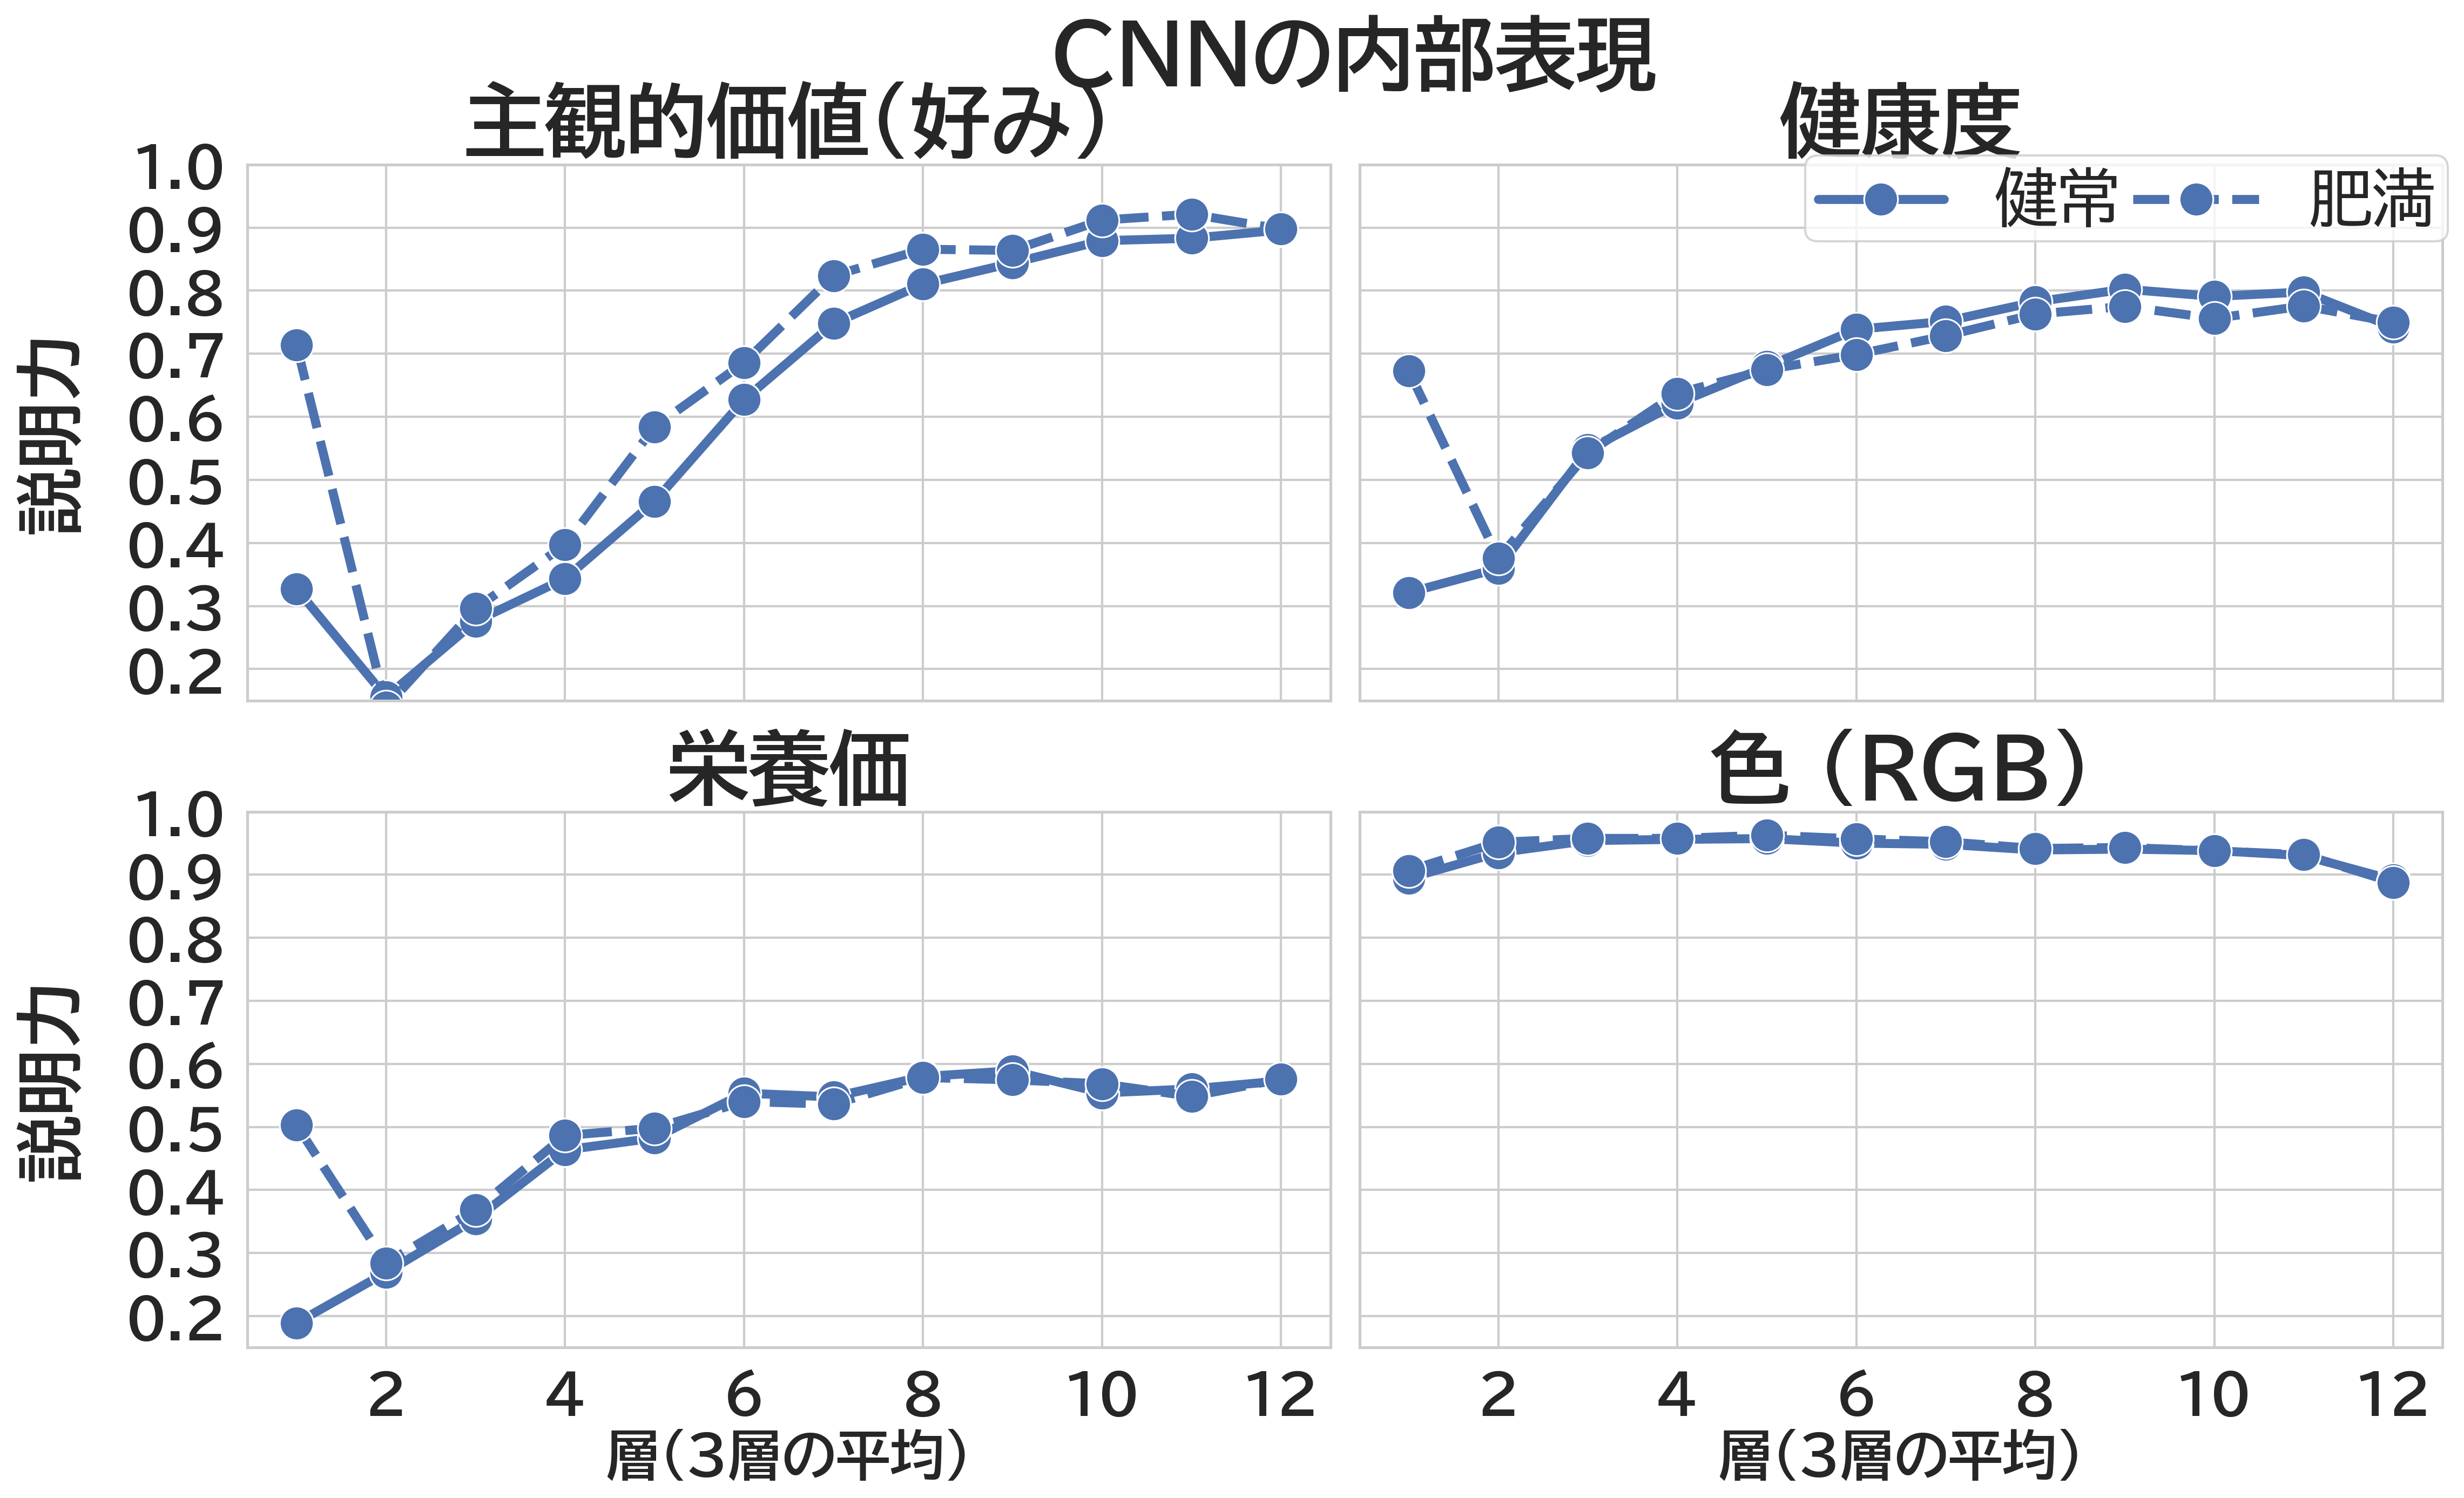

In [18]:
melt_df = (
    result_dfs.reset_index()
    .melt(
        id_vars=["index", "type"],
        # value_vars=["type"],
        var_name="Layer",
        value_name="Score",
    )
    .rename(columns={"index": "attribute"})
)
melt_df["Layer"] = melt_df["Layer"].astype(str).str.extract(r"(\d+)").astype(int)

# for type_, melt_df in melt_dfs.groupby("type"):
# print(type_)
df_list = []
group_dict = {
    "主観的価値(好み)": ["res_L_mean"],
    # "美味しさ": ["res_T_mean"],
    "健康度" : ["res_H_mean"],
    "色 (RGB)": ["blue", "green", "red"],
    # "カロリー": ["kcal_100g"],
    # "タンパク質": ["protein_100g"],
    # "脂質": ["fat_100g"],
    # "炭水化物": ["carbs_100g"],
    "栄養価": ["kcal_100g", "protein_100g", "fat_100g", "carbs_100g"],
    # "Size": ["kcal_total", "grams_total"],
}
for key, attrs in group_dict.items():
    # for attr in attrs:
    #     print(key, attr)
    attr_df = pd.DataFrame(
        melt_df[melt_df["attribute"].isin(attrs)]
        .groupby(["Layer", "type"])["Score"]
        .mean()
        .sort_index(level=1)
        .rolling(window=3, min_periods=1, step=3)
        .mean()
        .dropna()
        .reset_index(level=1)
    )
    display(attr_df.T)
    attr_df["attr"] = key
    attr_df.index = attr_df.index // 3 +  1
    df_list.append(attr_df)

data_df = pd.concat(df_list)
pd.set_option("display.max_columns", 100)
display(data_df.T)
fig, axes = plt.subplots(2,2, figsize=(16, 9), dpi=300)
# current_palette = sns.color_palette("Set2", 8)
for i, (attr, data) in enumerate(data_df.groupby("attr")):
    ax = axes.flatten()[i]
    print(data)
    sns.lineplot(
        data=data.reset_index(),
        x="Layer",
        y="Score",
        # hue="type",
        style="type",
        marker="o",
        markersize=15,
        palette=sns.color_palette("Set1")[i+1:],
        # err_kws={"alpha": 0.15},
        linewidth=4,
        ax=ax,
    )
    melt_df["Layer"] = melt_df["Layer"].astype("int")
    melt_df["attribute"] = melt_df["attribute"].astype("category")
    melt_df["Score"] = melt_df["Score"].astype(float)
    ax.set_ylim(0.15, 1)

    if i > 1:
        ax.set_xlabel("層(３層の平均)", fontsize=24, fontweight="bold")
        ax.set_xticklabels(
            range(0, 13, 2),
            fontsize=24,
            fontweight="bold",
        )
    else:
        ax.set_xlabel("")
        ax.set_xticklabels([])
    if i % 2 == 0:
        ax.set_ylabel(
            "説明力", fontsize=30, labelpad=20, fontweight="bold"
        )
        ax.set_yticklabels(ax.get_yticklabels(), fontsize=24, fontweight="bold")
    else:
        ax.set_ylabel("")
        ax.set_yticklabels([])
    # plt.text(
    #     -0.12,
    #     0.5,
    #     "(各層の活性化パターンを用い\n画像属性の予測と実測の相関係数)",
    #     fontsize=30,
    #     horizontalalignment="center",
    #     verticalalignment="center",
    #     transform=plt.gca().transAxes,
    #     # rotation=45,
    #     rotation=90,
    # )

    ax.set_title(f"{attr}", fontsize=36, fontweight="bold")


    if i != 1:
        ax.legend().remove()
        continue
    handle, label = ax.get_legend_handles_labels()
    ax.legend(
        handles=handle,
        labels=[
            "健常","肥満"
        ],
        fontsize=28,
        loc="upper left",
        borderpad=0.2,
        # labelspacing=0.2,
        bbox_to_anchor=(0.4, 1.04),
        borderaxespad=0.2,
        # horizon
        ncol=2,
        # framealpha=0,
        columnspacing=0.2,
        # fontweight="bold",
    )
plt.tight_layout()
plt.text( x=-3, y=2.2, s="CNNの内部表現", fontsize=36, fontweight="bold",va="center")
plt.show()
fig.savefig(
    os.path.join(DATA_PATH, "output", "activation_regression", VERSION, "pca",  f"{attr}_result.png"), bbox_inches="tight"
)

## RSA

In [19]:
from scipy.stats import t

matrixs = torch.load(
    os.path.join(
        ROOT_PATH, "tmp", VERSION, "normal", "intermediate_feature", "layer_matrixs.pth"
    )
)
corr = np.corrcoef(
    fat_100g_similarity_matrix[gram_value_is_not_nan, :][:, gram_value_is_not_nan].flatten(),
    matrixs[28, gram_value_is_not_nan, :][:, gram_value_is_not_nan].flatten()
)[0, 1]

    # Compute p-value using SciPy
n = len(fat_100g_similarity_matrix[gram_value_is_not_nan, :][:, gram_value_is_not_nan].flatten())
print(n)

t_stat  = abs(corr * np.sqrt((n - 2) / (1 - corr**2)))
df = n - 2
p_value = t.sf(t_stat, df) 
print(corr,t_stat, p_value)

/tmp/ipykernel_3895674/3304866359.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  matrixs = torch.load(


NameError: name 'gram_value_is_not_nan' is not defined

/tmp/ipykernel_1531812/898505502.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  matrixs = torch.load(


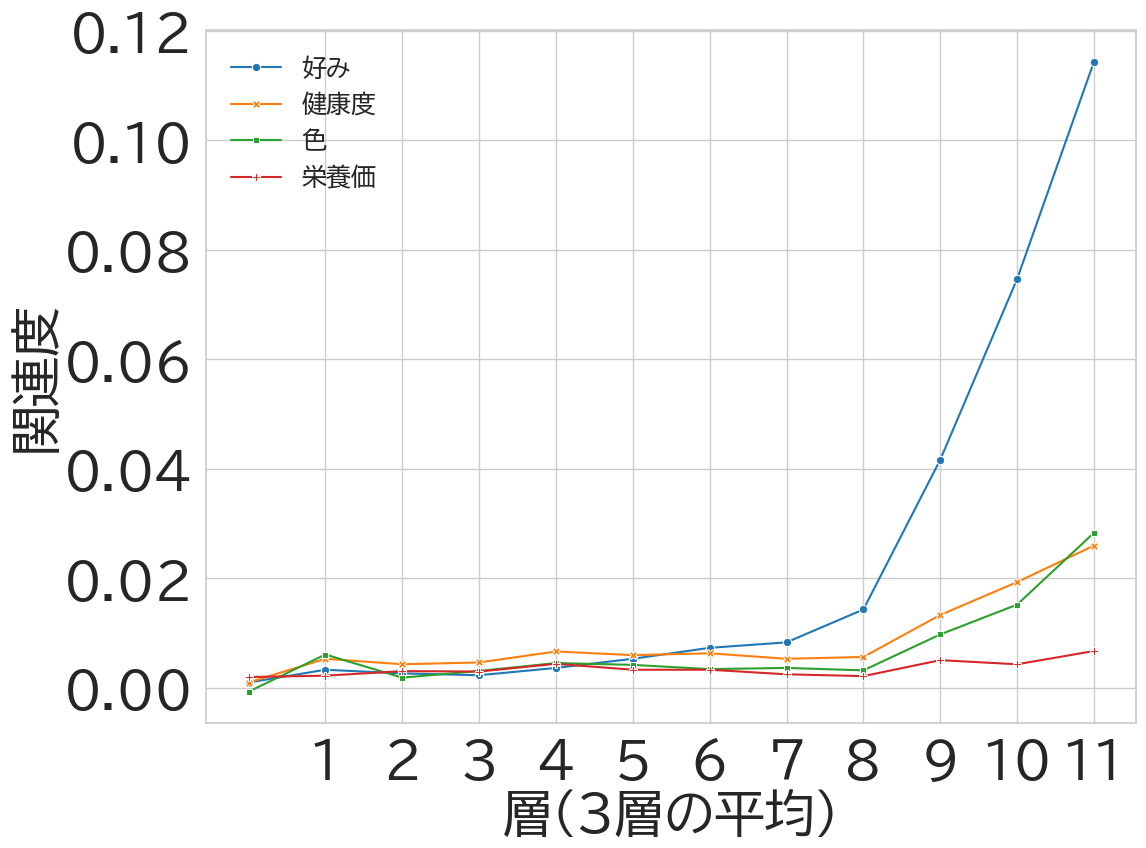

/tmp/ipykernel_1531812/898505502.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  matrixs = torch.load(


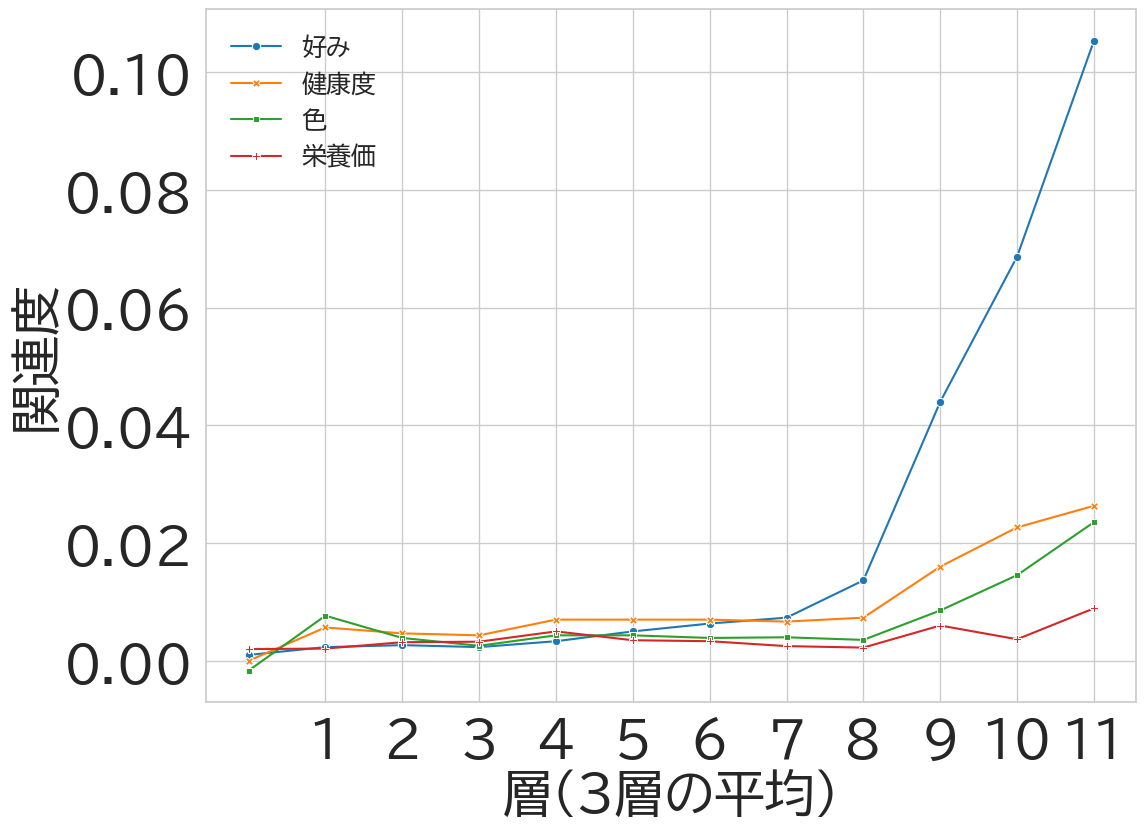

In [ ]:
from src.analysis import calc_matrix_corr

for type_ in ["obesity", "normal"]:
    matrixs = torch.load(
        os.path.join(
            ROOT_PATH, "tmp", VERSION, type_,  "intermediate_feature", "layer_matrixs.pth"
        )
    )
    matrixs = matrixs[:-1, :, :]

    df_corr = calc_matrix_corr(matrixs, L_similarity_matrix)
    likeness_corr = pd.Series(
        df_corr["pearson_correlation"].values, index=df_corr.index + 1, name="Likeness"
    )
    df_corr = calc_matrix_corr(matrixs, H_similarity_matrix)
    healthiness_corr = pd.Series(
        df_corr["pearson_correlation"].values, index=df_corr.index + 1, name="Healthiness"
    )
    df_corr = calc_matrix_corr(matrixs, T_similarity_matrix)
    tastiness_corr = pd.Series(
        df_corr["pearson_correlation"].values, index=df_corr.index + 1, name="Tastiness"
    )
    gram_value_is_not_nan = ~np.isnan(food_values["grams_total"].values)
    df_corr = calc_matrix_corr(matrixs, kcal_100g_similarity_matrix)
    kcal_100g_corr = pd.Series(
        df_corr["pearson_correlation"].values, index=df_corr.index + 1, name="Kcal_100g"
    )


    df_corr = calc_matrix_corr(
        matrixs[:, gram_value_is_not_nan, :][:, :, gram_value_is_not_nan],
        protein_100g_similarity_matrix[gram_value_is_not_nan, :][:, gram_value_is_not_nan],
    )
    protein_100g_corr = pd.Series(
        df_corr["pearson_correlation"].values, index=df_corr.index + 1, name="protein_100g"
    )


    df_corr = calc_matrix_corr(
        matrixs[:, gram_value_is_not_nan, :][:, :, gram_value_is_not_nan],
        fat_100g_similarity_matrix[gram_value_is_not_nan, :][:, gram_value_is_not_nan],
    )
    fat_100g_corr = pd.Series(
        df_corr["pearson_correlation"].values, index=df_corr.index + 1, name="fat_100g"
    )


    df_corr = calc_matrix_corr(
        matrixs[:, gram_value_is_not_nan, :][:, :, gram_value_is_not_nan],
        carbs_100g_similarity_matrix[gram_value_is_not_nan, :][:, gram_value_is_not_nan],
    )
    carbs_100g_corr = pd.Series(
        df_corr["pearson_correlation"].values, index=df_corr.index + 1, name="carbs_100g"
    )


    df_corr = calc_matrix_corr(matrixs, kcal_similarity_matrix)
    kcals_corr = pd.Series(
        df_corr["pearson_correlation"].values, index=df_corr.index + 1, name="Kcals"
    )


    df_corr = calc_matrix_corr(matrixs, processed_similarity_matrix)
    processed_corr = pd.Series(
        df_corr["pearson_correlation"].values, index=df_corr.index + 1, name="Processed"
    )


    df_corr = calc_matrix_corr(matrixs, testy_similarity_matrix)
    testy_corr = pd.Series(
        df_corr["pearson_correlation"].values, index=df_corr.index + 1, name="Testy"
    )


    df_corr = calc_matrix_corr(
        matrixs[:, gram_value_is_not_nan, :][:, :, gram_value_is_not_nan],
        grams_similarity_matrix[gram_value_is_not_nan, :][:, gram_value_is_not_nan],
    )
    grams_corr = pd.Series(
        df_corr["pearson_correlation"].values, index=df_corr.index + 1, name="Grams"
    )


    df_corr = calc_matrix_corr(matrixs, red_similarity_matrix)
    red_corr = pd.Series(
        df_corr["pearson_correlation"].values, index=df_corr.index + 1, name="Red"
    )


    df_corr = calc_matrix_corr(matrixs, green_similarity_matrix)
    green_corr = pd.Series(
        df_corr["pearson_correlation"].values, index=df_corr.index + 1, name="Green"
    )


    df_corr = calc_matrix_corr(matrixs, blue_similarity_matrix)
    blue_corr = pd.Series(
        df_corr["pearson_correlation"].values, index=df_corr.index + 1, name="Blue"
    )

    df_corr = pd.concat(
        [
            likeness_corr,
            healthiness_corr,
            tastiness_corr,
            kcal_100g_corr,
            protein_100g_corr,
            fat_100g_corr,
            carbs_100g_corr,
            kcals_corr,
            processed_corr,
            testy_corr,
            grams_corr,
            red_corr,
            green_corr,
            blue_corr,
        ],
        axis=1,
    )
    group_dict = {
        "好み": ["Likeness"],
        # "美味しさ": ["Tastiness"],
        "健康度": ["Healthiness"],
        "色": ["Red", "Green", "Blue"],
        # "カロリー": ["Kcal_100g"],
        # "タンパク質": ["protein_100g"],
        # "脂質": ["fat_100g"],
        # "炭水化物": ["carbs_100g"],
        "栄養価": ["Kcal_100g", "protein_100g", "fat_100g", "carbs_100g"],
        # "Size": ["Kcals", "Grams"],
    }
    data = pd.DataFrame(
        {
            key: df_corr[attrs]
            .mean(axis=1)
            .rolling(window=3, min_periods=1, step=3)
            .mean()
            .dropna()
            .reset_index(drop=True)
            for key, attrs in group_dict.items()
        }
    )

    # min_max_scaler = MinMaxScaler((0,1))
    fig = plt.figure(figsize=(12, 9))
    sns.lineplot(data=data, dashes=False, markers=True, palette="tab10")
    plt.xlabel("層(３層の平均)", fontsize=36)
    plt.ylabel(
        "関連度", fontsize=36
    )
    plt.yticks(fontsize=36)
    plt.xticks(fontsize=36)
    plt.xticks(range(1, max(data.index.to_series().unique()) + 1))
    plt.legend(fontsize=18, loc="upper left", borderpad=0.5, labelspacing=0.5, framealpha=0)

    plt.show()
    fig.savefig(os.path.join(DATA_PATH, "output", "RSA", f"{type_}_result.png"))